## Social Data Science Exam 

# Labor force and unemployemnt gender gap : comparison analysis bewteen Denmark and Spain

#### Packages needed: 

In [1]:
import numpy as np
import pandas as pd
import csv

from matplotlib import pyplot as plt
%matplotlib inline

from scipy.stats import norm

In [2]:
# we need the latest seaborn version (0.9.0), which is not in the Anaconda environment yet
# !conda install -y -c anaconda seaborn=0.9.0

In [3]:
import seaborn as sns

In [4]:
# make the pandas column wider to see all the text in the data frame cells
pd.set_option('max_colwidth', 800)

Steps to download the dataset: 

In [5]:
# download the dataset using the Kaggle API (more info here: https://github.com/Kaggle/kaggle-api)
# for this dataset we need to log in (we need to create an API token and save the resulted JSON file
# in the folder ~/.kaggle/)
# the dataset can be found at the following URL: https://www.kaggle.com/muhammadfahadkhalid/gender-statistics/metadata

!kaggle datasets download -d muhammadfahadkhalid/gender-statistics --unzip


  0%|          | 0.00/543k [00:00<?, ?B/s]
100%|##########| 543k/543k [00:00<00:00, 1.50MB/s]


In [6]:
dataset_name = 'd12abcce-68f6-4e71-af9a-5b4b508a9ce4_Data.csv'

## Data analysis

In [7]:
# observe what daata I can extract
gender_df = pd.read_csv(dataset_name)
gender_df.head(4)

,Series Name,Series Code,Country Name,Country Code,1998 [YR1998],1999 [YR1999],2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],...,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018]
0,"Access to anti-retroviral drugs, female (%)",SH.HIV.ARTC.FE.ZS,Afghanistan,AFG,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,"Access to anti-retroviral drugs, female (%)",SH.HIV.ARTC.FE.ZS,Australia,AUS,..,..,66,67,64,63,...,68,73,71,77,78,84,89,93,94,..
2,"Access to anti-retroviral drugs, female (%)",SH.HIV.ARTC.FE.ZS,Argentina,ARG,..,..,21,26,30,33,...,54,58,61,64,67,69,71,73,75,..
3,"Access to anti-retroviral drugs, female (%)",SH.HIV.ARTC.FE.ZS,Austria,AUT,..,..,28,30,78,77,...,92,87,85,88,95,95,95,95,94,..


### First data cleaning steps

In [8]:
# replace all empty values with value recognized by pandas (NaN)
gender_df.replace('..', np.nan, inplace=True)

# rename the columns with years: e.g. from '1998 [YR1998]' to simply '1998'
gender_df.columns = list(gender_df.columns[:4]) + list(gender_df.columns[4:].str[:4])

In [9]:
gender_df.head(3)

,Series Name,Series Code,Country Name,Country Code,1998,1999,2000,2001,2002,2003,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"Access to anti-retroviral drugs, female (%)",SH.HIV.ARTC.FE.ZS,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Access to anti-retroviral drugs, female (%)",SH.HIV.ARTC.FE.ZS,Australia,AUS,NaN,NaN,66,67,64,63,...,68,73,71,77,78,84,89,93,94,NaN
2,"Access to anti-retroviral drugs, female (%)",SH.HIV.ARTC.FE.ZS,Argentina,ARG,NaN,NaN,21,26,30,33,...,54,58,61,64,67,69,71,73,75,NaN


In [10]:
# find unique criterias
[(idx, criteria) for idx, criteria in enumerate(gender_df['Series Name'].unique())]

[(0, 'Access to anti-retroviral drugs, female (%)'),
 (1, 'Access to anti-retroviral drugs, male (%)'),
 (2,
  'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)'),
 (3,
  'Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)'),
 (4,
  'Adjusted net enrollment rate, primary, female (% of primary school age children)'),
 (5,
  'Adjusted net enrollment rate, primary, male (% of primary school age children)'),
 (6, 'Age at first marriage, male'),
 (7, 'Age at first marriage, female'),
 (8, 'Age dependency ratio (% of working-age population)'),
 (9,
  'Cause of death, by communicable diseases, ages 15-34, female (% of relevant age group)'),
 (10,
  'Cause of death, by communicable diseases, ages 15-34, male (% of relevant age group)'),
 (11,
  'Cause of death, by communicable diseases, ages 35-59, female (% of relevant age group)'),
 (12,
  'Cause of death,

In [11]:
# find unique countries data
gender_df['Country Name'].unique()

array(['Afghanistan', 'Australia', 'Argentina', 'Austria', 'Bahrain',
       'Azerbaijan', 'Bangladesh', 'Brazil', 'Canada', 'China',
       'Colombia', 'Denmark', 'Czech Republic', 'East Asia & Pacific',
       'Egypt, Arab Rep.', 'France', 'Germany', 'Hungary', 'Iceland',
       'Iraq', 'Iran, Islamic Rep.', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Kenya', 'Kuwait', 'Latvia', 'Libya', 'Malaysia',
       'Maldives', 'Malta', 'Mexico', 'Middle East & North Africa',
       'Netherlands', 'New Zealand', 'Nepal', 'North America', 'Norway',
       'Oman', 'Pakistan', 'Poland', 'Portugal', 'Philippines', 'Romania',
       'Russian Federation', 'Saudi Arabia', 'Singapore', 'Serbia',
       'Somalia', 'South Asia', 'South Africa', 'Spain', 'Sri Lanka',
       'Switzerland', 'Sweden', 'Tajikistan', 'Thailand', 'Tanzania',
       'Turkey', 'Uganda', 'United Kingdom', 'United Arab Emirates',
       'United States', 'Vietnam', 'Uzbekistan', 'Zimbabwe',
       'Yemen, Rep.', 'Korea, Rep.', '

### Data selection - Denmark and Spain

In [12]:
# we will work only with Spain and Denmark so we select these countries
countries = ['Spain', 'Denmark']

gender_df = gender_df.loc[gender_df['Country Name'].isin(countries)].reset_index(drop = True)

**Data cleaning**

In [13]:
# The values 'Data from database: Gender Statistics' and 'Last Updated: 07/16/2019', from the column 'Series Name',
# do not contain any data, so we delete them
gender_df.drop(gender_df.loc[gender_df['Series Name'] == 'Last Updated: 07/16/2019'].index, inplace=True)

gender_df.drop(gender_df.loc[gender_df['Series Name'] == 'Data from database: Gender Statistics'].index, inplace=True)

In [14]:
# group by the series name, splitting into dataframes of the same criterias
gender_df_grouped = gender_df.groupby('Series Name')    
gender_df_list = [gender_df_grouped.get_group(x) for x in gender_df_grouped.groups]
gender_df_list

[                                   Series Name        Series Code  \
 0  Access to anti-retroviral drugs, female (%)  SH.HIV.ARTC.FE.ZS   
 1  Access to anti-retroviral drugs, female (%)  SH.HIV.ARTC.FE.ZS   
 
   Country Name Country Code 1998 1999 2000 2001 2002 2003  ... 2009 2010 2011  \
 0      Denmark          DNK  NaN  NaN   38   39   40   42  ...   56   60   63   
 1        Spain          ESP  NaN  NaN   30   35   39   44  ...   63   68   69   
 
   2012 2013 2014 2015 2016 2017 2018  
 0   67   64   74   78   80   81  NaN  
 1   72   73   75   78   78   82  NaN  
 
 [2 rows x 25 columns],
                                  Series Name        Series Code Country Name  \
 2  Access to anti-retroviral drugs, male (%)  SH.HIV.ARTC.MA.ZS      Denmark   
 3  Access to anti-retroviral drugs, male (%)  SH.HIV.ARTC.MA.ZS        Spain   
 
   Country Code 1998 1999 2000 2001 2002 2003  ... 2009 2010 2011 2012 2013  \
 2          DNK  NaN  NaN   43   44   46   47  ...   61   64   68   72

In [15]:
# print unique criteria
for i, x in enumerate(gender_df_list):
    print(i, x.iloc[[0]]['Series Name'])

0 0    Access to anti-retroviral drugs, female (%)
Name: Series Name, dtype: object
1 2    Access to anti-retroviral drugs, male (%)
Name: Series Name, dtype: object
2 4    Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)
Name: Series Name, dtype: object
3 6    Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)
Name: Series Name, dtype: object
4 8    Adjusted net enrollment rate, primary, female (% of primary school age children)
Name: Series Name, dtype: object
5 10    Adjusted net enrollment rate, primary, male (% of primary school age children)
Name: Series Name, dtype: object
6 14    Age at first marriage, female
Name: Series Name, dtype: object
7 12    Age at first marriage, male
Name: Series Name, dtype: object
8 16    Age dependency ratio (% of working-age population)
Name: Series Name, dtype: object
9 18    Cause of death, by communicable dis

Name: Series Name, dtype: object
138 276    Unemployment, youth male (% of male labor force ages 15-24) (modeled ILO estimate)
Name: Series Name, dtype: object
139 278    Unemployment, youth male (% of male labor force ages 15-24) (national estimate)
Name: Series Name, dtype: object
140 280    Wage and salaried workers, female (% of female employment) (modeled ILO estimate)
Name: Series Name, dtype: object
141 282    Wage and salaried workers, male (% of male employment) (modeled ILO estimate)
Name: Series Name, dtype: object
142 284    Women are able to work in the same industries as men (1=yes; 0=no)
Name: Series Name, dtype: object
143 286    Women participating in decision of what food to cook daily (% of women age 15-49)
Name: Series Name, dtype: object
144 288    Women participating in making daily purchase decisions (% of women age 15-49)
Name: Series Name, dtype: object
145 290    Women who do not own a house (% of women age 15-49)
Name: Series Name, dtype: object
146 292    Wo

### Define functions to ease data cleaning

In [16]:
def unify_by_gender(df1, df2):
    df_unified = pd.concat([df1, df2])
    
    df_unified['Gender'] = np.where(df_unified['Series Name'].str.contains('female'), 'female', 'male')
    
    df_unified['Series Name'] = df_unified['Series Name'].map(lambda x: x.replace('female', '') if 'female' in x else x.replace('male', ''))
    
    # rearrange columns, by bringing the 'Gender' column from the end on the 2nd position (0 indexed)
    cols = df_unified.columns.tolist()    
    cols = cols[:2] + cols[-1:] + cols[2:-1]  
    
    df_unified = df_unified[cols]
        
    return df_unified.reset_index(drop=True) 

**Try in regards with account ownership and independence by gender**

In [17]:
# make 'Account ownership at a financial institution or with a mobile-money-service provider' criteria as one df
financial_account_ownership = unify_by_gender(gender_df_list[2], gender_df_list[3])
financial_account_ownership

,Series Name,Series Code,Gender,Country Name,Country Code,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"Account ownership at a financial institution or with a mobile-money-service provider, (% of population ages 15+)",FX.OWN.TOTL.FE.ZS,female,Denmark,DNK,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,99.4979019165039,NaN,NaN,100,NaN,NaN,100,NaN
1,"Account ownership at a financial institution or with a mobile-money-service provider, (% of population ages 15+)",FX.OWN.TOTL.FE.ZS,female,Spain,ESP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,91.6614761352539,NaN,NaN,97.5683822631836,NaN,NaN,91.6412506103516,NaN
2,"Account ownership at a financial institution or with a mobile-money-service provider, (% of population ages 15+)",FX.OWN.TOTL.MA.ZS,male,Denmark,DNK,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,100,NaN,NaN,100,NaN,NaN,99.8329620361328,NaN
3,"Account ownership at a financial institution or with a mobile-money-service provider, (% of population ages 15+)",FX.OWN.TOTL.MA.ZS,male,Spain,ESP,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,95.2049255371094,NaN,NaN,97.5823211669922,NaN,NaN,95.8810424804688,NaN


In [18]:
# total number of rows of 'financial_account_ownership' data frame
no_rows_in_fin_acc_own = financial_account_ownership.shape[0]

In [19]:
# check if all the values of the '2004' column are null
financial_account_ownership['2004'].isnull().sum() == no_rows_in_fin_acc_own

True

**Defining function to drop columns**

In [20]:
def drop_full_nan_columns(df):
    columns = df.columns.tolist()
    
    no_rows = df.shape[0]

    for column in columns:
        if df[column].isnull().sum() == no_rows:
            del df[column]

In [21]:
drop_full_nan_columns(financial_account_ownership)
financial_account_ownership

# after we drop the columns that have only NaN values we are left with only three years columns...

,Series Name,Series Code,Gender,Country Name,Country Code,2011,2014,2017
0,"Account ownership at a financial institution or with a mobile-money-service provider, (% of population ages 15+)",FX.OWN.TOTL.FE.ZS,female,Denmark,DNK,99.4979019165039,100,100
1,"Account ownership at a financial institution or with a mobile-money-service provider, (% of population ages 15+)",FX.OWN.TOTL.FE.ZS,female,Spain,ESP,91.6614761352539,97.5683822631836,91.6412506103516
2,"Account ownership at a financial institution or with a mobile-money-service provider, (% of population ages 15+)",FX.OWN.TOTL.MA.ZS,male,Denmark,DNK,100,100,99.8329620361328
3,"Account ownership at a financial institution or with a mobile-money-service provider, (% of population ages 15+)",FX.OWN.TOTL.MA.ZS,male,Spain,ESP,95.2049255371094,97.5823211669922,95.8810424804688


## Labor force

This part of the analyisis focused on the labor force in Spain and Denmark

In [22]:
population_female_15_64_yrs_df = gender_df_list[102]
population_male_15_64_yrs_df = gender_df_list[103]

labor_force_df = unify_by_gender(population_female_15_64_yrs_df, population_male_15_64_yrs_df)
labor_force_df.head(7)

,Series Name,Series Code,Gender,Country Name,Country Code,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"Population ages 15-64,",SP.POP.1564.FE.IN,female,Denmark,DNK,1750178,1753024,1756217,1760643,1764157,...,1792751,1796500,1798000,1798813,1799254,1800406,1805396,1815652,1823679,1830676
1,"Population ages 15-64,",SP.POP.1564.FE.IN,female,Spain,ESP,13735739,13778043,13821086,13931708,14138226,...,15610891,15635790,15618762,15567261,15460982,15359008,15285850,15270453,15265848,15260792
2,"Population ages 15-64,",SP.POP.1564.MA.IN,male,Denmark,DNK,1800252,1801772,1804068,1806148,1807751,...,1827091,1830717,1831615,1832448,1832961,1833814,1838248,1848836,1856545,1862940
3,"Population ages 15-64,",SP.POP.1564.MA.IN,male,Spain,ESP,13818572,13900906,13986776,14135262,14381616,...,16097692,16122084,16053696,15934435,15754338,15587343,15467395,15433801,15427320,15432490


In [23]:
labor_force_df.dtypes

Series Name     object
Series Code     object
Gender          object
Country Name    object
Country Code    object
1998            object
1999            object
2000            object
2001            object
2002            object
2003            object
2004            object
2005            object
2006            object
2007            object
2008            object
2009            object
2010            object
2011            object
2012            object
2013            object
2014            object
2015            object
2016            object
2017            object
2018            object
dtype: object

In [24]:
# convert the year columns from data type 'object' to integer
for column in labor_force_df.columns[5:]:
    labor_force_df[column] = pd.to_numeric(labor_force_df[column], downcast='integer')

In [25]:
# check if the dataframe contains any null values
labor_force_df.isnull().values.any()

False

[Text(0, 0.5, '2018 (in tens millions of people)'),
 Text(0.5, 1.0, '2018 Labor force (Ages 15-64) by gender')]

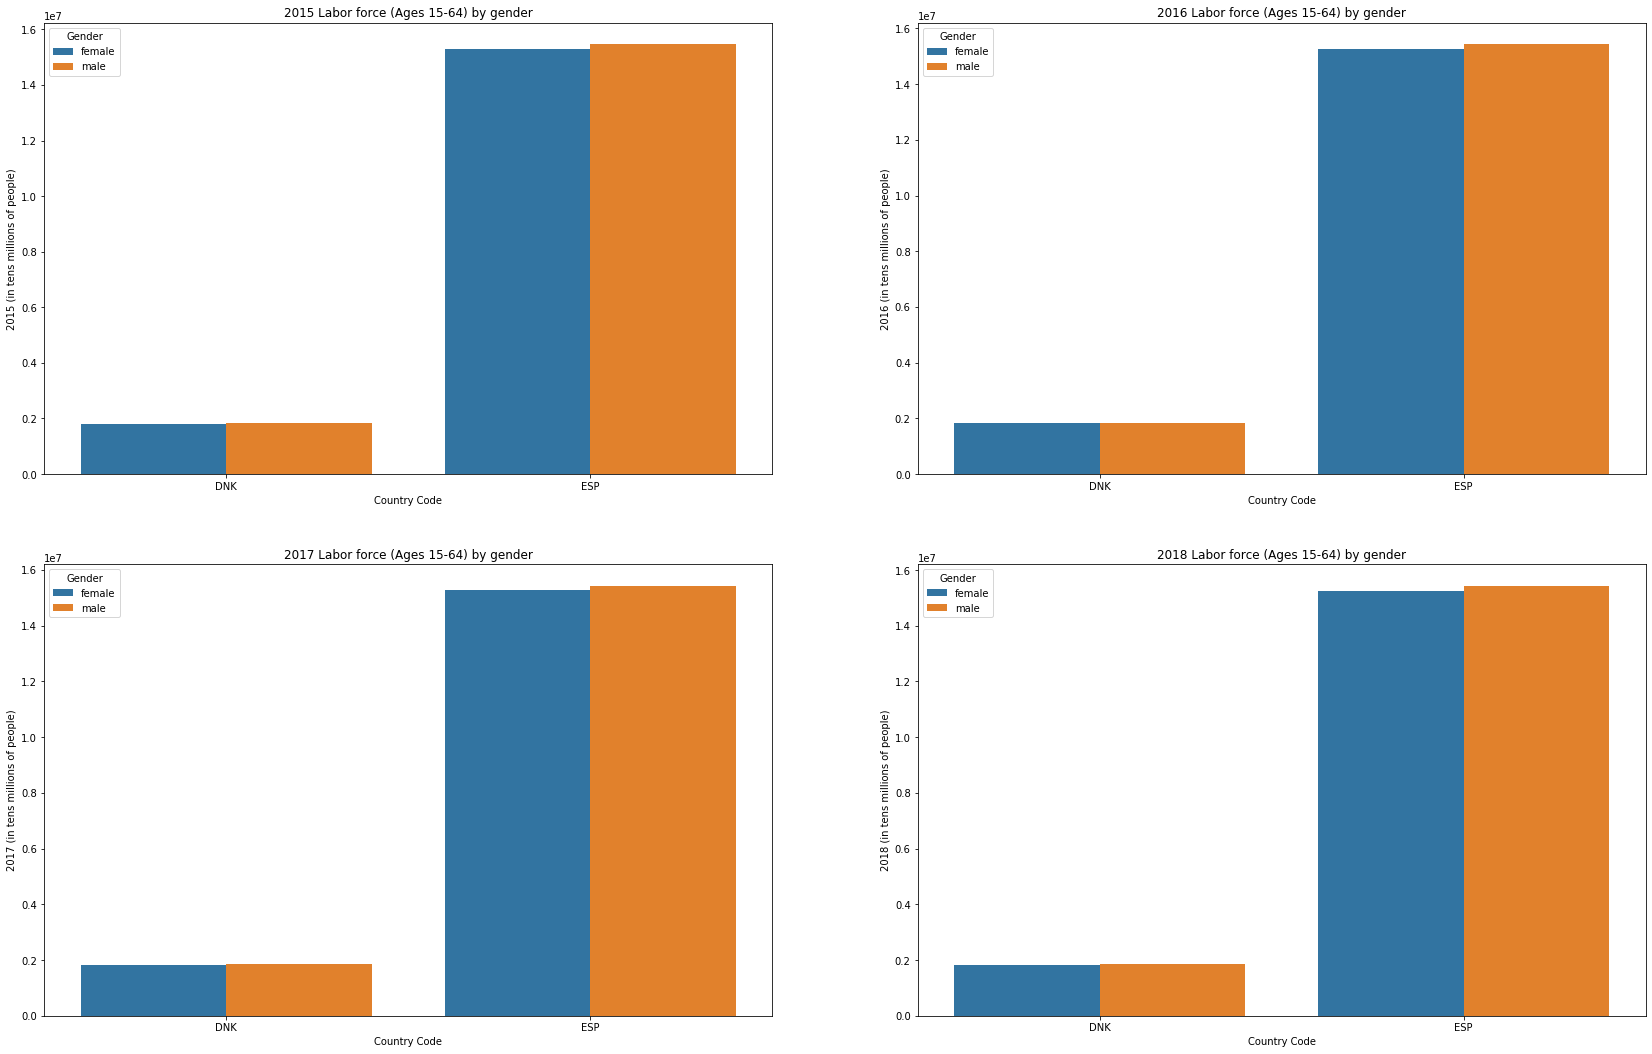

In [26]:
dim = (28.7, 18.27)

fig, ax = plt.subplots(2, 2, figsize=dim)

sns.barplot(ax = ax[0][0], x="Country Code", y='2015', hue="Gender", data=labor_force_df)
sns.barplot(ax = ax[0][1], x="Country Code", y='2016', hue="Gender", data=labor_force_df)
sns.barplot(ax = ax[1][0], x="Country Code", y='2017', hue="Gender", data=labor_force_df)
sns.barplot(ax = ax[1][1], x="Country Code", y='2018', hue="Gender", data=labor_force_df)

ax[0][0].set(ylabel='2015 (in tens millions of people)', title='2015 Labor force (Ages 15-64) by gender')
ax[0][1].set(ylabel='2016 (in tens millions of people)', title='2016 Labor force (Ages 15-64) by gender')
ax[1][0].set(ylabel='2017 (in tens millions of people)', title='2017 Labor force (Ages 15-64) by gender')
ax[1][1].set(ylabel='2018 (in tens millions of people)', title='2018 Labor force (Ages 15-64) by gender')

## Employment in main Branches: agriculture, industry, services(in Denmark and Spain)
This part of the analysis will focus on how each gender is split between the three main economical branches

In [27]:
# get employment data about the agriculture branch
agriculture_employment_female_df = gender_df_list[48].reset_index(drop = True)
agriculture_employment_male_df = gender_df_list[49].reset_index(drop = True)

agriculture_employment_df = unify_by_gender(agriculture_employment_female_df, agriculture_employment_male_df)

# convert the data from the years columns to float (now it is object type)
for c in agriculture_employment_df.columns[5:]:
    agriculture_employment_df[c] = pd.to_numeric(agriculture_employment_df[c], downcast='float')
    
agriculture_employment_df

,Series Name,Series Code,Gender,Country Name,Country Code,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"Employment in agriculture, (% of employment) (modeled ILO estimate)",SL.AGR.EMPL.FE.ZS,female,Denmark,DNK,1.779,1.452,1.962,1.708,1.630,...,1.121,0.850,0.883,1.086,0.986,0.894,1.059,1.039,1.010,0.992
1,"Employment in agriculture, (% of employment) (modeled ILO estimate)",SL.AGR.EMPL.FE.ZS,female,Spain,ESP,5.327,5.051,4.768,4.497,3.976,...,2.444,2.437,2.383,2.406,2.234,2.238,2.104,2.136,2.269,2.225
2,"Employment in agriculture, (% of employment) (modeled ILO estimate)",SL.AGR.EMPL.MA.ZS,male,Denmark,DNK,5.321,4.902,5.137,5.133,4.584,...,3.904,3.850,3.765,3.952,3.944,3.902,3.768,3.863,3.285,3.262
3,"Employment in agriculture, (% of employment) (modeled ILO estimate)",SL.AGR.EMPL.MA.ZS,male,Spain,ESP,8.965,8.391,7.788,7.751,7.234,...,5.425,5.584,5.481,5.709,6.010,5.902,5.788,5.947,6.072,6.022


In [28]:
# get employment data about the industry branch
industry_employment_female_df = gender_df_list[50].reset_index(drop = True)
industry_employment_male_df = gender_df_list[51].reset_index(drop = True)

industry_employment_df = unify_by_gender(industry_employment_female_df, industry_employment_male_df)

# convert the data from the years columns to float (now it is object type)
for c in industry_employment_df.columns[5:]:
    industry_employment_df[c] = pd.to_numeric(industry_employment_df[c], downcast='float')
    
industry_employment_df

,Series Name,Series Code,Gender,Country Name,Country Code,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"Employment in industry, (% of employment) (modeled ILO estimate)",SL.IND.EMPL.FE.ZS,female,Denmark,DNK,14.650000,15.382000,13.500000,14.402,12.250000,...,10.049000,9.222000,9.346000,9.477,9.182000,9.290000,9.664000,9.302000,8.957000,8.819000
1,"Employment in industry, (% of employment) (modeled ILO estimate)",SL.IND.EMPL.FE.ZS,female,Spain,ESP,13.746000,13.489000,14.441000,14.368,14.314000,...,10.060000,9.534000,8.888000,9.040,8.465000,8.428000,8.667000,8.425000,8.845000,8.685000
2,"Employment in industry, (% of employment) (modeled ILO estimate)",SL.IND.EMPL.MA.ZS,male,Denmark,DNK,36.337002,36.686001,35.532001,34.855,33.221001,...,29.541000,29.059000,29.362000,28.930,28.757000,28.155001,27.802000,26.976000,27.632999,27.438999
3,"Employment in industry, (% of employment) (modeled ILO estimate)",SL.IND.EMPL.MA.ZS,male,Spain,ESP,39.452000,40.115002,40.219002,41.402,41.183998,...,35.821999,33.556999,32.119999,30.274,29.115999,28.577999,29.158001,28.844999,29.299000,29.080000


In [29]:
# get employment data about the services branch
services_employment_female_df = gender_df_list[52].reset_index(drop = True)
services_employment_male_df = gender_df_list[53].reset_index(drop = True)

services_employment_df = unify_by_gender(services_employment_female_df, services_employment_male_df)

# convert the data from the years columns to float (now it is object type)
for c in services_employment_df.columns[5:]:
    services_employment_df[c] = pd.to_numeric(services_employment_df[c], downcast='float')


services_employment_df

,Series Name,Series Code,Gender,Country Name,Country Code,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"Employment in services, (% of employment) (modeled ILO estimate)",SL.SRV.EMPL.FE.ZS,female,Denmark,DNK,83.570999,83.165001,84.537003,83.889999,86.120003,...,88.830002,89.928001,89.769997,89.436996,89.832001,89.816002,89.277000,89.660004,90.032997,90.189003
1,"Employment in services, (% of employment) (modeled ILO estimate)",SL.SRV.EMPL.FE.ZS,female,Spain,ESP,80.927002,81.459999,80.791000,81.135002,81.709999,...,87.496002,88.028999,88.728996,88.553001,89.301003,89.334000,89.228996,89.440002,88.887001,89.089996
2,"Employment in services, (% of employment) (modeled ILO estimate)",SL.SRV.EMPL.MA.ZS,male,Denmark,DNK,58.341999,58.411999,59.331001,60.012001,62.195000,...,66.555000,67.091003,66.873001,67.117996,67.299004,67.943001,68.430000,69.161003,69.082001,69.299004
3,"Employment in services, (% of employment) (modeled ILO estimate)",SL.SRV.EMPL.MA.ZS,male,Spain,ESP,51.583000,51.493999,51.993000,50.847000,51.581001,...,58.752998,60.859001,62.397999,64.016998,64.875000,65.518997,65.054001,65.208000,64.628998,64.898003


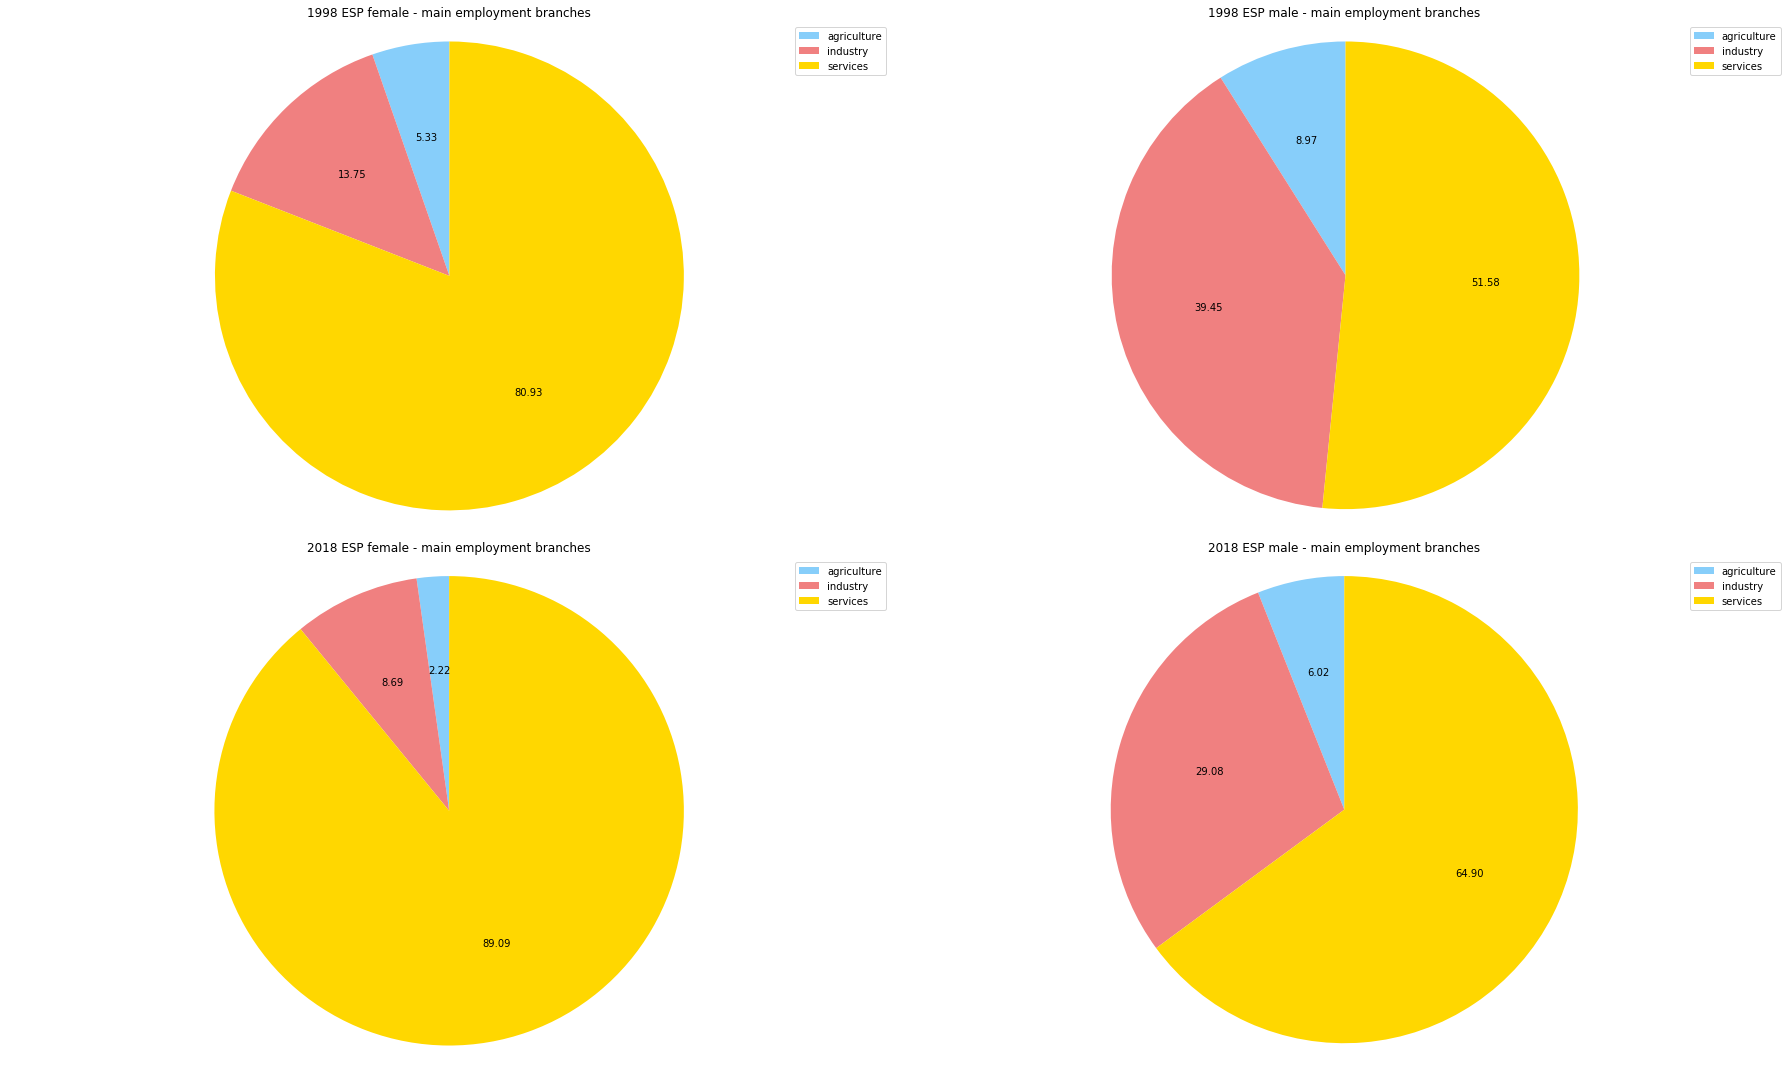

In [30]:
year1 = '1998'
year2 = '2018'

labels = ['agriculture', 'industry', 'services']
colors = ['lightskyblue', 'lightcoral', 'gold']
titles = [year1 + ' ESP female - main employment branches', year1 + ' ESP male - main employment branches',
         year2 + ' ESP female - main employment branches', year2 + ' ESP male - main employment branches']

fig,ax = plt.subplots(2, 2, figsize=(25, 15))

values_female_year2 = [format(agriculture_employment_df.at[1, year2], '.2f'),
                      format(industry_employment_df.at[1, year2], '.2f'),
                      format(services_employment_df.at[1, year2], '.2f')]
    
values_male_year2 = [format(agriculture_employment_df.at[3, year2], '.2f'),
                    format(industry_employment_df.at[3, year2], '.2f'),
                    format(services_employment_df.at[3, year2], '.2f')]

values_female_year1 = [format(agriculture_employment_df.at[1, year1], '.2f'),
                      format(industry_employment_df.at[1, year1], '.2f'),
                      format(services_employment_df.at[1, year1], '.2f')]
    
values_male_year1 = [format(agriculture_employment_df.at[3, year1], '.2f'),
                    format(industry_employment_df.at[3, year1], '.2f'),
                    format(services_employment_df.at[3, year1], '.2f')]


patches_0_0, texts_0_0, autotexts_0_0 = ax[0][0].pie(values_female_year1, colors=colors, autopct='', startangle=90)
patches_0_1, texts_0_1, autotexts_0_1 = ax[0][1].pie(values_male_year1, colors=colors, autopct='', startangle=90)
patches_1_0, texts_1_0, autotexts_1_0 = ax[1][0].pie(values_female_year2, colors=colors, autopct='', startangle=90)
patches_1_1, texts_1_1, autotexts_1_1 = ax[1][1].pie(values_male_year2, colors=colors, autopct='', startangle=90)

# put the actual values on the pie chart
for i, a in enumerate(autotexts_0_0):
    a.set_text("{}".format(values_female_year1[i]))

for i, a in enumerate(autotexts_0_1):
    a.set_text("{}".format(values_male_year1[i]))
    
for i, a in enumerate(autotexts_1_0):
    a.set_text("{}".format(values_female_year2[i]))

for i, a in enumerate(autotexts_1_1):
    a.set_text("{}".format(values_male_year2[i]))
    
for i in range(2):
    for j in range(2):
        ax[i][j].legend(labels, loc="best")
        ax[i][j].axis('equal')
        ax[i][j].set_title(titles[i * 2 + j])
        
plt.tight_layout()

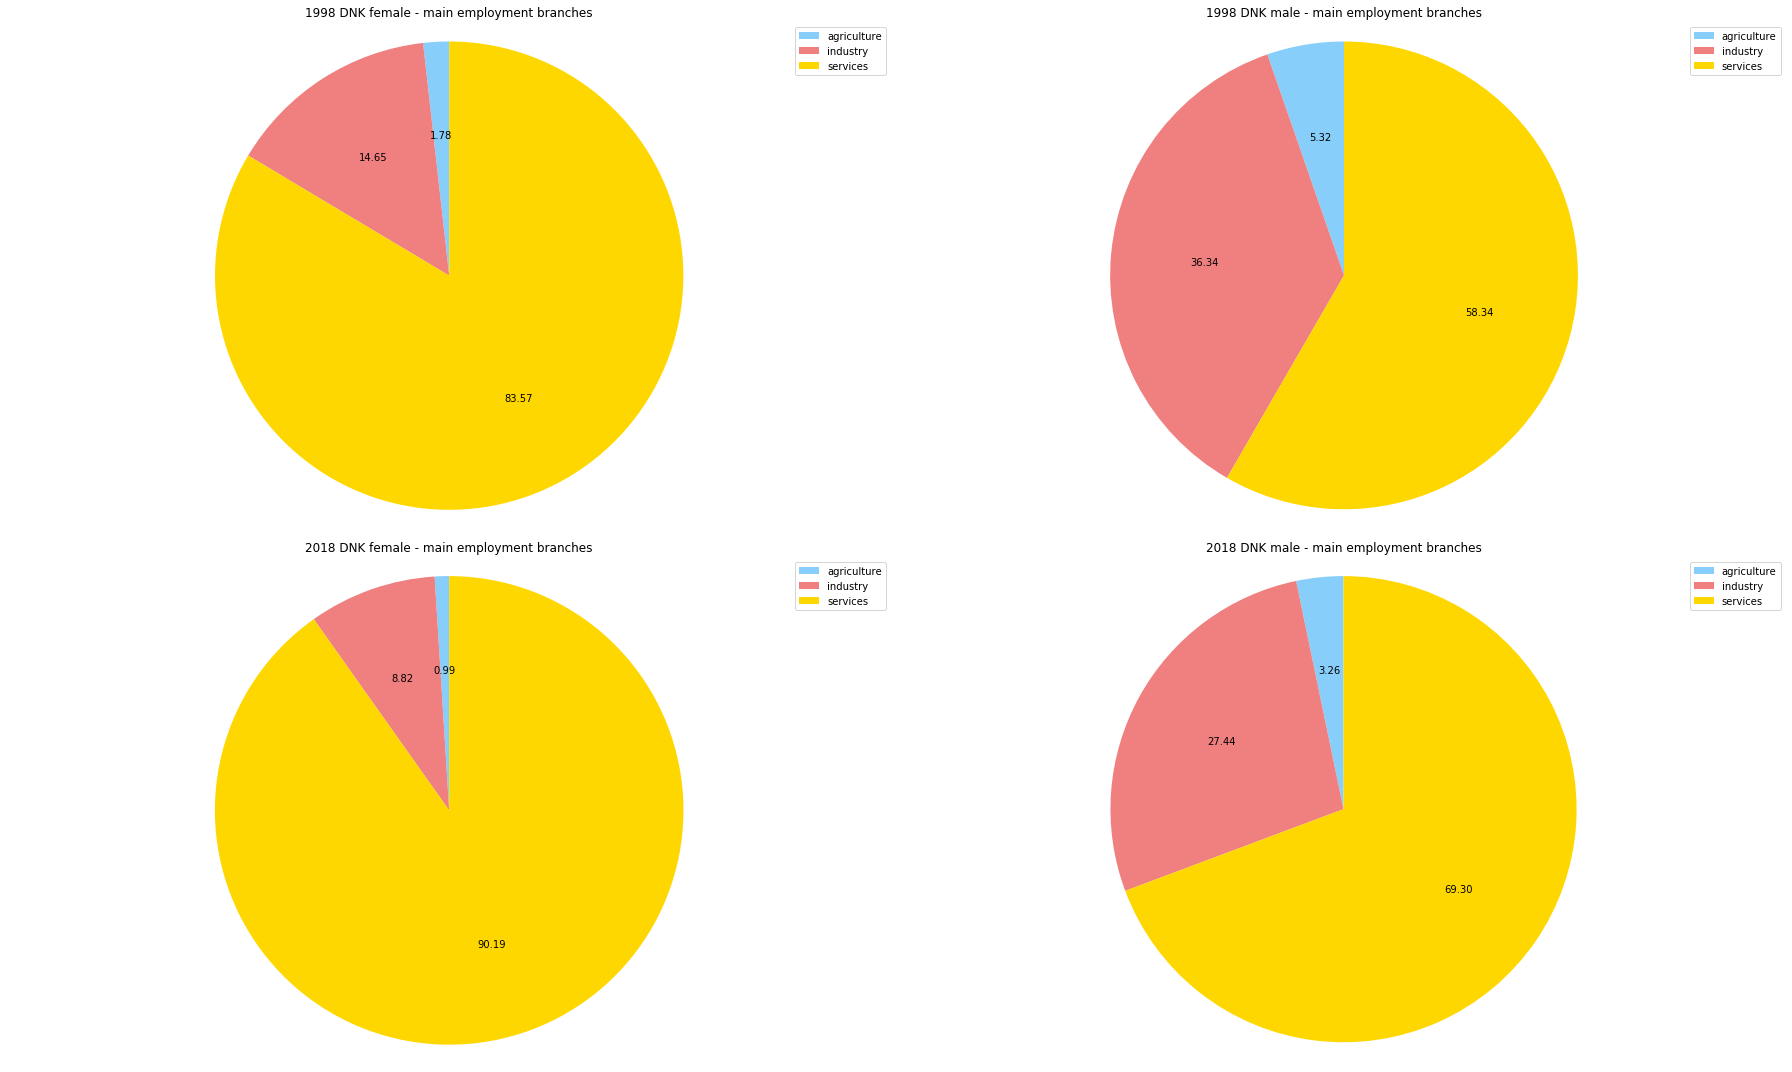

In [31]:
year1 = '1998'
year2 = '2018'

labels = ['agriculture', 'industry', 'services']
colors = ['lightskyblue', 'lightcoral', 'gold']
titles = [year1 + ' DNK female - main employment branches', year1 + ' DNK male - main employment branches',
         year2 + ' DNK female - main employment branches', year2 + ' DNK male - main employment branches']

fig,ax = plt.subplots(2, 2, figsize=(25, 15))

values_female_year1 = [format(agriculture_employment_df.at[0, year1], '.2f'),
                      format(industry_employment_df.at[0, year1], '.2f'),
                      format(services_employment_df.at[0, year1], '.2f')]
    
values_male_year1 = [format(agriculture_employment_df.at[2, year1], '.2f'),
                    format(industry_employment_df.at[2, year1], '.2f'),
                    format(services_employment_df.at[2, year1], '.2f')]

values_female_year2 = [format(agriculture_employment_df.at[0, year2], '.2f'),
                      format(industry_employment_df.at[0, year2], '.2f'),
                      format(services_employment_df.at[0, year2], '.2f')]
    
values_male_year2 = [format(agriculture_employment_df.at[2, year2], '.2f'),
                    format(industry_employment_df.at[2, year2], '.2f'),
                    format(services_employment_df.at[2, year2], '.2f')]


patches_0_0, texts_0_0, autotexts_0_0 = ax[0][0].pie(values_female_year1, colors=colors, autopct='', startangle=90)
patches_0_1, texts_0_1, autotexts_0_1 = ax[0][1].pie(values_male_year1, colors=colors, autopct='', startangle=90)
patches_1_0, texts_1_0, autotexts_1_0 = ax[1][0].pie(values_female_year2, colors=colors, autopct='', startangle=90)
patches_1_1, texts_1_1, autotexts_1_1 = ax[1][1].pie(values_male_year2, colors=colors, autopct='', startangle=90)

# put the actual values on the pie chart
for i, a in enumerate(autotexts_0_0):
    a.set_text("{}".format(values_female_year1[i]))

for i, a in enumerate(autotexts_0_1):
    a.set_text("{}".format(values_male_year1[i]))
    
for i, a in enumerate(autotexts_1_0):
    a.set_text("{}".format(values_female_year2[i]))

for i, a in enumerate(autotexts_1_1):
    a.set_text("{}".format(values_male_year2[i]))
    
for i in range(2):
    for j in range(2):
        ax[i][j].legend(labels, loc="best")
        ax[i][j].axis('equal')
        ax[i][j].set_title(titles[i * 2 + j])
        
plt.tight_layout()

## Unemployment

This part of the analaysis will focus on the unemployemnt in Denamrk and Spain by gender

In [32]:
unemployment_df = unify_by_gender(gender_df_list[132],gender_df_list[134])
unemployment_df

,Series Name,Series Code,Gender,Country Name,Country Code,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"Unemployment, (% of labor force) (modeled ILO estimate)",SL.UEM.TOTL.FE.ZS,female,Denmark,DNK,6.41300010681152,5.90199995040894,4.97399997711182,4.78299999237061,4.31799983978271,...,5.31400012969971,6.46299982070923,7.46600008010864,7.5460000038147,7.27199983596802,6.82000017166138,6.44399976730347,6.63899993896484,5.93599987030029,5.15199995040894
1,"Unemployment, (% of labor force) (modeled ILO estimate)",SL.UEM.TOTL.FE.ZS,female,Spain,ESP,26.6480007171631,22.8540000915527,20.3680000305176,15.0620002746582,16.0659999847412,...,18.1280002593994,20.2269992828369,21.8139991760254,25.0349998474121,26.6749992370605,25.4300003051758,23.5540008544922,21.3880004882813,19.0380001068115,17.6340007781982
2,"Unemployment, (% of labor force) (modeled ILO estimate)",SL.UEM.TOTL.MA.ZS,male,Denmark,DNK,3.85599994659424,4.48799991607666,4.04300022125244,3.625,4.23600006103516,...,6.625,8.35599994659424,7.66900014877319,7.50799989700317,6.74599981307983,6.38199996948242,5.9229998588562,5.76800012588501,5.56899976730347,4.81599998474121
3,"Unemployment, (% of labor force) (modeled ILO estimate)",SL.UEM.TOTL.MA.ZS,male,Spain,ESP,13.6669998168945,10.7919998168945,9.4980001449585,7.35699987411499,7.86999988555908,...,17.6459999084473,19.568000793457,21.0459995269775,24.5809993743896,25.6040000915527,23.6019992828369,20.7800006866455,18.1259994506836,15.6660003662109,13.6379995346069


In [33]:
unemployment_df.dtypes

Series Name     object
Series Code     object
Gender          object
Country Name    object
Country Code    object
1998            object
1999            object
2000            object
2001            object
2002            object
2003            object
2004            object
2005            object
2006            object
2007            object
2008            object
2009            object
2010            object
2011            object
2012            object
2013            object
2014            object
2015            object
2016            object
2017            object
2018            object
dtype: object

In [34]:
# convert the data from the years columns to float (now it is object type)
for year_column in unemployment_df.columns[5:]:
    unemployment_df[year_column] = pd.to_numeric(unemployment_df[year_column], downcast='float')

In [35]:
esp_describe_df = unemployment_df[unemployment_df['Country Code'] == 'ESP'].describe()
esp_describe_df

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,20.157501,16.823000,14.933001,11.209500,11.968000,11.992001,11.693501,9.56400,8.853001,8.559000,...,17.887001,19.897499,21.430000,24.807999,26.139500,24.515999,22.167000,19.757000,17.352001,15.636000
std,9.178953,8.529122,7.686251,5.448258,5.795447,5.245318,4.748221,3.43371,3.534120,3.033489,...,0.340826,0.465982,0.543058,0.321027,0.757311,1.292592,1.961514,2.306583,2.384364,2.825600
min,13.667000,10.792000,9.498000,7.357000,7.870000,8.283000,8.336000,7.13600,6.354000,6.414000,...,17.646000,19.568001,21.046000,24.580999,25.604000,23.601999,20.780001,18.125999,15.666000,13.638000
25%,16.912250,13.807500,12.215500,9.283250,9.919000,10.137500,10.014750,8.35000,7.603500,7.486500,...,17.766500,19.732750,21.237999,24.694499,25.871750,24.059000,21.473501,18.941500,16.509000,14.637000
50%,20.157500,16.823000,14.933000,11.209500,11.968000,11.992000,11.693500,9.56400,8.853000,8.559000,...,17.887000,19.897500,21.429999,24.808000,26.139500,24.516000,22.167001,19.757000,17.352000,15.636000
75%,23.402750,19.838500,17.650500,13.135750,14.017000,13.846500,13.372250,10.77800,10.102500,9.631500,...,18.007500,20.062250,21.621999,24.921500,26.407249,24.973000,22.860501,20.572500,18.195000,16.635000
max,26.648001,22.854000,20.368000,15.062000,16.066000,15.701000,15.051000,11.99200,11.352000,10.704000,...,18.128000,20.226999,21.813999,25.035000,26.674999,25.430000,23.554001,21.388000,19.038000,17.634001


Text(0.5, 0, 'ESP - mean of both male and female unemployment rate for years 1998-2018 (%)')

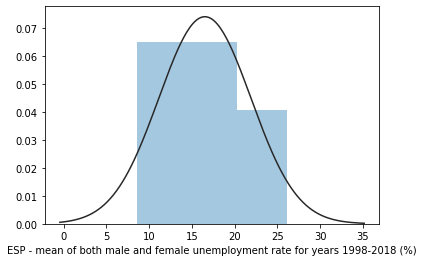

In [36]:
ax = sns.distplot(esp_describe_df.loc['mean'], fit=norm, kde=False)
ax.set_xlabel('ESP - mean of both male and female unemployment rate for years 1998-2018 (%)')

In [37]:
dnk_describe_df = unemployment_df[unemployment_df['Country Code'] == 'DNK'].describe()
dnk_describe_df

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,...,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,5.134500,5.195000,4.508500,4.20400,4.277000,5.422500,5.219000,4.857500,3.934000,3.82400,...,5.969500,7.409500,7.567500,7.52700,7.009000,6.601000,6.183500,6.20350,5.752500,4.984000
std,1.808072,0.999849,0.658316,0.81883,0.057983,0.463155,0.311127,0.594677,0.849942,0.53033,...,0.927017,1.338553,0.143543,0.02687,0.371938,0.309713,0.368403,0.61589,0.259508,0.237588
min,3.856000,4.488000,4.043000,3.62500,4.236000,5.095000,4.999000,4.437000,3.333000,3.44900,...,5.314000,6.463000,7.466000,7.50800,6.746000,6.382000,5.923000,5.76800,5.569000,4.816000
25%,4.495250,4.841500,4.275750,3.91450,4.256500,5.258750,5.109000,4.647250,3.633500,3.63650,...,5.641750,6.936250,7.516750,7.51750,6.877500,6.491500,6.053250,5.98575,5.660750,4.900000
50%,5.134500,5.195000,4.508500,4.20400,4.277000,5.422500,5.219000,4.857500,3.934000,3.82400,...,5.969500,7.409500,7.567500,7.52700,7.009000,6.601000,6.183500,6.20350,5.752500,4.984000
75%,5.773750,5.548500,4.741250,4.49350,4.297500,5.586250,5.329000,5.067750,4.234500,4.01150,...,6.297250,7.882750,7.618250,7.53650,7.140500,6.710500,6.313750,6.42125,5.844250,5.068000
max,6.413000,5.902000,4.974000,4.78300,4.318000,5.750000,5.439000,5.278000,4.535000,4.19900,...,6.625000,8.356000,7.669000,7.54600,7.272000,6.820000,6.444000,6.63900,5.936000,5.152000


Text(0.5, 0, 'DNK - mean of both male and female unemployment rate for years 1998-2018 (%)')

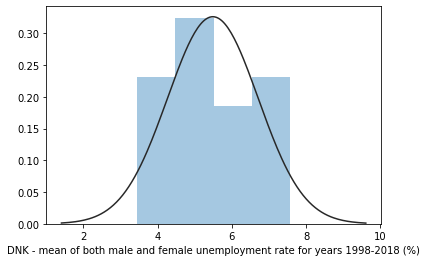

In [38]:
ax = sns.distplot(dnk_describe_df.loc['mean'], fit=norm, kde=False)
ax.set_xlabel('DNK - mean of both male and female unemployment rate for years 1998-2018 (%)')

[Text(0, 0.5, '2018 (%)'), Text(0.5, 1.0, '2018 Unemployment rate by gender')]

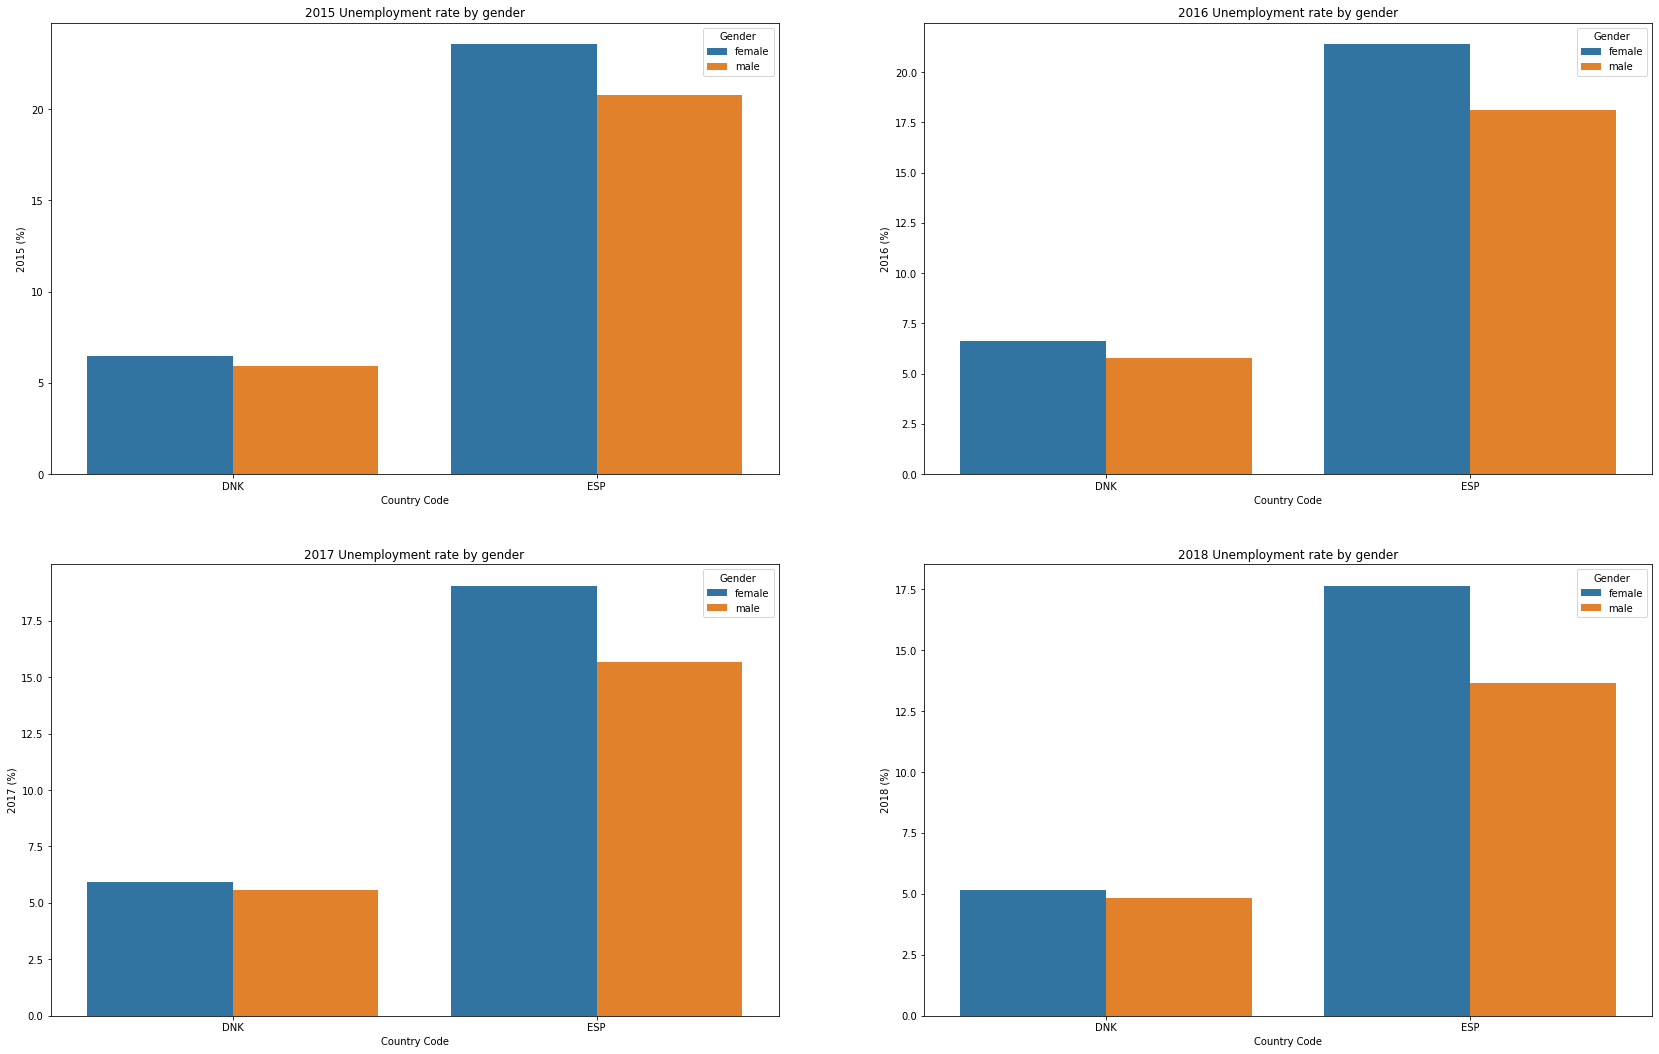

In [39]:
# plots of unemployment from the years 2015-2018 of the European countries
dim = (28.7, 18.27)

fig, ax = plt.subplots(2, 2, figsize=dim)

sns.barplot(ax = ax[0][0], x="Country Code", y='2015', hue="Gender", data=unemployment_df)
sns.barplot(ax = ax[0][1], x="Country Code", y='2016', hue="Gender", data=unemployment_df)
sns.barplot(ax = ax[1][0], x="Country Code", y='2017', hue="Gender", data=unemployment_df)
sns.barplot(ax = ax[1][1], x="Country Code", y='2018', hue="Gender", data=unemployment_df)


ax[0][0].set(ylabel='2015 (%)', title='2015 Unemployment rate by gender')
ax[0][1].set(ylabel='2016 (%)', title='2016 Unemployment rate by gender')
ax[1][0].set(ylabel='2017 (%)', title='2017 Unemployment rate by gender')
ax[1][1].set(ylabel='2018 (%)', title='2018 Unemployment rate by gender')

In [40]:
# sort dataframe to better see male and female data for a country
unemployment_df.sort_values(inplace = True, by=['Country Code', 'Gender'])

In [41]:
# prepare data for seaborn lineplot
unemployment_df_sns = unemployment_df.transpose()
unemployment_df_sns.head(7)

,0,2,1,3
Series Name,"Unemployment, (% of labor force) (modeled ILO estimate)","Unemployment, (% of labor force) (modeled ILO estimate)","Unemployment, (% of labor force) (modeled ILO estimate)","Unemployment, (% of labor force) (modeled ILO estimate)"
Series Code,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS
Gender,female,male,female,male
Country Name,Denmark,Denmark,Spain,Spain
Country Code,DNK,DNK,ESP,ESP
1998,6.413,3.856,26.648,13.667
1999,5.902,4.488,22.854,10.792


In [42]:
unemployment_df_sns.columns = ['DNK female', 'DNK male', 'ESP female', 'ESP male']
unemployment_df_sns.head(4)

,DNK female,DNK male,ESP female,ESP male
Series Name,"Unemployment, (% of labor force) (modeled ILO estimate)","Unemployment, (% of labor force) (modeled ILO estimate)","Unemployment, (% of labor force) (modeled ILO estimate)","Unemployment, (% of labor force) (modeled ILO estimate)"
Series Code,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS
Gender,female,male,female,male
Country Name,Denmark,Denmark,Spain,Spain


In [43]:
# make the data frame index an actual column of the data frame since we need the years for the lineplot
unemployment_df_sns['Years'] = unemployment_df_sns.index
unemployment_df_sns.head(7)

,DNK female,DNK male,ESP female,ESP male,Years
Series Name,"Unemployment, (% of labor force) (modeled ILO estimate)","Unemployment, (% of labor force) (modeled ILO estimate)","Unemployment, (% of labor force) (modeled ILO estimate)","Unemployment, (% of labor force) (modeled ILO estimate)",Series Name
Series Code,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,Series Code
Gender,female,male,female,male,Gender
Country Name,Denmark,Denmark,Spain,Spain,Country Name
Country Code,DNK,DNK,ESP,ESP,Country Code
1998,6.413,3.856,26.648,13.667,1998
1999,5.902,4.488,22.854,10.792,1999


In [44]:
# the 'Years' column is inserted as the last column; bring it as the first one
columns = [unemployment_df_sns.columns[-1]] + unemployment_df_sns.columns.tolist()[:-1]
unemployment_df_sns = unemployment_df_sns[columns]

# now that we made the index of the data frame an actual column we reset it
unemployment_df_sns = unemployment_df_sns.reset_index(drop = True)
unemployment_df_sns.head(7)

,Years,DNK female,DNK male,ESP female,ESP male
0,Series Name,"Unemployment, (% of labor force) (modeled ILO estimate)","Unemployment, (% of labor force) (modeled ILO estimate)","Unemployment, (% of labor force) (modeled ILO estimate)","Unemployment, (% of labor force) (modeled ILO estimate)"
1,Series Code,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS,SL.UEM.TOTL.FE.ZS,SL.UEM.TOTL.MA.ZS
2,Gender,female,male,female,male
3,Country Name,Denmark,Denmark,Spain,Spain
4,Country Code,DNK,DNK,ESP,ESP
5,1998,6.413,3.856,26.648,13.667
6,1999,5.902,4.488,22.854,10.792


In [45]:
#remove rows that will not be used for the lineplot
unemployment_df_sns = unemployment_df_sns[(unemployment_df_sns['Years'] != 'Series Name') &
                                         (unemployment_df_sns['Years'] != 'Series Code') &
                                         (unemployment_df_sns['Years'] != 'Gender') &
                                         (unemployment_df_sns['Years'] != 'Country Name') &
                                         (unemployment_df_sns['Years'] != 'Country Code')
                                         ].reset_index(drop = True)
unemployment_df_sns.head(7)

,Years,DNK female,DNK male,ESP female,ESP male
0,1998,6.413,3.856,26.648,13.667
1,1999,5.902,4.488,22.854,10.792
2,2000,4.974,4.043,20.368,9.498
3,2001,4.783,3.625,15.062,7.357
4,2002,4.318,4.236,16.066,7.87
5,2003,5.75,5.095,15.701,8.283
6,2004,5.439,4.999,15.051,8.336


In [46]:
unemployment_df_sns.dtypes

Years         object
DNK female    object
DNK male      object
ESP female    object
ESP male      object
dtype: object

In [47]:
# convert the data from the columns to integer ('Years' column) and to float (the other columnes)
unemployment_df_sns['Years'] = pd.to_numeric(unemployment_df_sns['Years'], downcast='integer')

for col in unemployment_df_sns.columns[1:]:
    unemployment_df_sns[col] = pd.to_numeric(unemployment_df_sns[col], downcast='float')

In [48]:
unemployment_df_sns.head(3)

,Years,DNK female,DNK male,ESP female,ESP male
0,1998,6.413,3.856,26.648001,13.667
1,1999,5.902,4.488,22.854000,10.792
2,2000,4.974,4.043,20.368000,9.498


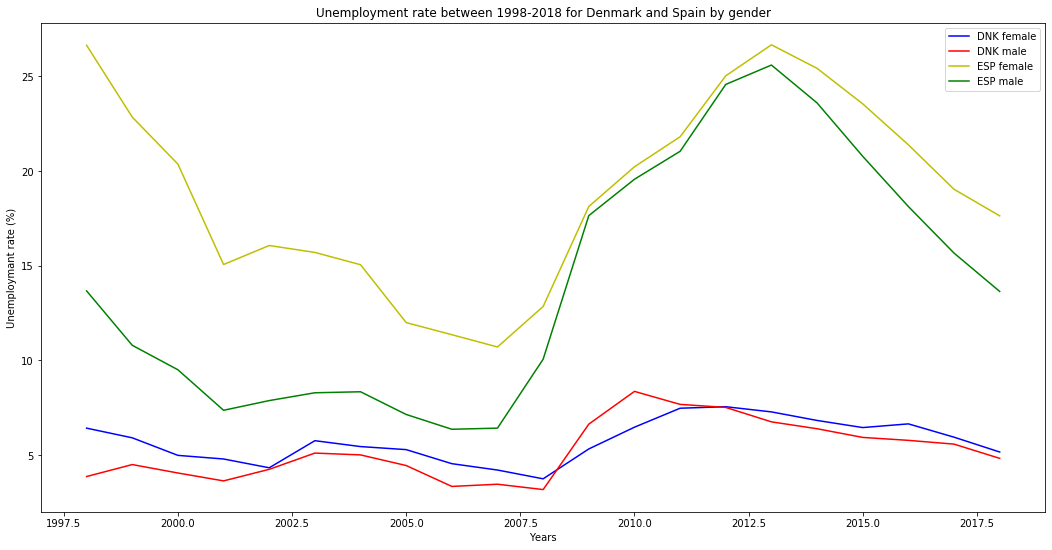

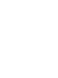

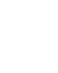

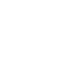

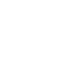

In [49]:
dim = (18, 9)
fig, ax = plt.subplots(figsize=dim)

plot1 = sns.relplot(x='Years', y="DNK female", sort=False, kind="line", data=unemployment_df_sns, ax = ax, color='b')
plot2 = sns.relplot(x='Years', y="DNK male",   sort=False, kind="line", data=unemployment_df_sns, ax = ax, color='r')
plot3 = sns.relplot(x='Years', y="ESP female", sort=False, kind="line", data=unemployment_df_sns, ax = ax, color='y')
plot4 = sns.relplot(x='Years', y="ESP male",   sort=False, kind="line", data=unemployment_df_sns, ax = ax, color='g')

plot1.fig.set_visible(False)
plot2.fig.set_visible(False)
plot3.fig.set_visible(False)
plot4.fig.set_visible(False)

plot1.fig.set_size_inches(0.1, 0.1) 
plot2.fig.set_size_inches(0.1, 0.1)
plot3.fig.set_size_inches(0.1, 0.1)
plot4.fig.set_size_inches(0.1, 0.1)

ax.set(ylabel='Unemploymant rate (%)',
       title='Unemployment rate between 1998-2018 for Denmark and Spain by gender')

ax.legend(['DNK female', 'DNK male', 'ESP female', 'ESP male'])

## Unemployment by education levels

This part of the analysis will focus on unemployment differences between the basic level of education, intermediate level of education and advanced level of education

In [50]:
unemployment_basic_educ_female_df = gender_df_list[128]
unemployment_basic_educ_male_df = gender_df_list[129]

unemployment_basic_educ_df = unify_by_gender(unemployment_basic_educ_female_df, unemployment_basic_educ_male_df)

# convert the data from the years columns to float (now it is object type)
for c in unemployment_basic_educ_df.columns[5:]:
    unemployment_basic_educ_df[c] = pd.to_numeric(unemployment_basic_educ_df[c], downcast='float')
    
unemployment_basic_educ_df

,Series Name,Series Code,Gender,Country Name,Country Code,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"Unemployment with basic education, (% of labor force with basic education)",SL.UEM.BASC.FE.ZS,female,Denmark,DNK,9.8114,8.8359,7.651600,7.468900,7.3255,...,8.0716,9.6215,10.811000,11.257200,10.990800,10.134000,10.137300,10.151900,9.5648,NaN
1,"Unemployment with basic education, (% of labor force with basic education)",SL.UEM.BASC.FE.ZS,female,Spain,ESP,29.1008,24.8813,23.453899,17.744801,18.5811,...,25.5257,27.8881,29.413601,33.994499,36.264999,34.837700,33.409801,31.055700,28.3263,NaN
2,"Unemployment with basic education, (% of labor force with basic education)",SL.UEM.BASC.MA.ZS,male,Denmark,DNK,5.3184,6.7053,5.010000,5.004700,6.6008,...,10.0153,12.2365,11.650200,12.098400,11.171500,10.456600,9.340100,8.294000,8.6062,NaN
3,"Unemployment with basic education, (% of labor force with basic education)",SL.UEM.BASC.MA.ZS,male,Spain,ESP,15.0974,11.8110,10.802400,8.352900,9.1860,...,23.4746,26.3430,28.045700,33.063000,34.313999,31.907301,28.322399,25.069901,21.9909,NaN


In [51]:
unemployment_interm_educ_female_df = gender_df_list[130]
unemployment_interm_educ_male_df = gender_df_list[131]

unemployment_interm_educ_df = unify_by_gender(unemployment_interm_educ_female_df, unemployment_interm_educ_male_df)

# convert the data from the years columns to float (now it is object type)
for c in unemployment_interm_educ_df.columns[5:]:
    unemployment_interm_educ_df[c] = pd.to_numeric(unemployment_interm_educ_df[c], downcast='float')
    
unemployment_interm_educ_df

,Series Name,Series Code,Gender,Country Name,Country Code,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"Unemployment with intermediate education, (% of labor force with intermediate education)",SL.UEM.INTM.FE.ZS,female,Denmark,DNK,6.188600,5.5944,5.002000,4.7628,3.6896,...,4.980600,5.9469,6.590600,7.073800,7.186800,6.792600,5.7789,5.831500,5.132500,NaN
1,"Unemployment with intermediate education, (% of labor force with intermediate education)",SL.UEM.INTM.FE.ZS,female,Spain,ESP,27.412201,24.5145,20.769899,15.4686,16.9811,...,17.844999,20.8018,23.021999,25.482100,27.590401,26.635099,24.3036,22.294901,19.808599,NaN
2,"Unemployment with intermediate education, (% of labor force with intermediate education)",SL.UEM.INTM.MA.ZS,male,Denmark,DNK,3.570600,4.3596,3.880200,3.1698,3.6227,...,5.984000,7.5119,6.801500,6.600100,5.489000,5.240900,4.9660,4.622600,4.189900,NaN
3,"Unemployment with intermediate education, (% of labor force with intermediate education)",SL.UEM.INTM.MA.ZS,male,Spain,ESP,13.307900,10.8246,8.456000,6.8486,7.0344,...,15.959800,17.4259,19.540300,22.865101,24.255899,21.943899,19.1835,16.362400,14.441500,NaN


In [52]:
unemployment_adv_educ_female_df = gender_df_list[126]
unemployment_adv_educ_male_df = gender_df_list[127]

unemployment_adv_educ_df = unify_by_gender(unemployment_adv_educ_female_df, unemployment_adv_educ_male_df)

# convert the data from the years columns to float (now it is object type)
for c in unemployment_adv_educ_df.columns[5:]:
    unemployment_adv_educ_df[c] = pd.to_numeric(unemployment_adv_educ_df[c], downcast='float')
    
unemployment_adv_educ_df

,Series Name,Series Code,Gender,Country Name,Country Code,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"Unemployment with advanced education, (% of labor force with advanced education)",SL.UEM.ADVN.FE.ZS,female,Denmark,DNK,3.6611,3.504600,2.5638,3.2089,3.5171,...,3.3579,4.2942,5.4623,5.0585,4.634500,4.957400,5.1964,5.1911,4.7970,NaN
1,"Unemployment with advanced education, (% of labor force with advanced education)",SL.UEM.ADVN.FE.ZS,female,Spain,ESP,21.7131,18.304001,15.2820,10.8910,12.1785,...,10.4475,12.1498,13.5694,16.3298,17.548901,16.304001,14.9521,13.2113,11.5196,NaN
2,"Unemployment with advanced education, (% of labor force with advanced education)",SL.UEM.ADVN.MA.ZS,male,Denmark,DNK,3.0471,2.585500,2.6203,3.6505,3.7387,...,4.0439,5.2296,4.8371,4.4014,4.568700,4.337300,4.2932,4.5743,4.6082,NaN
3,"Unemployment with advanced education, (% of labor force with advanced education)",SL.UEM.ADVN.MA.ZS,male,Spain,ESP,9.6968,7.929200,6.9621,5.1631,5.5202,...,8.8502,10.1224,11.3570,13.3738,14.329900,13.095400,11.2530,9.9589,8.2575,NaN


In [53]:
# the column corresponding to the year 2018 has only NaN values, so we drop it
drop_full_nan_columns(unemployment_basic_educ_df)
drop_full_nan_columns(unemployment_interm_educ_df)
drop_full_nan_columns(unemployment_adv_educ_df)

print('basic {}\nintermediate {}\nadvanced {}'.format(
    unemployment_basic_educ_df.shape,
    unemployment_interm_educ_df.shape,
    unemployment_basic_educ_df.shape))

basic (4, 25)
intermediate (4, 25)
advanced (4, 25)


[Text(0, 0.5, '2017 (%)'),
 Text(0.5, 1.0, '2017 Unemployment rate by gender for people with basic education')]

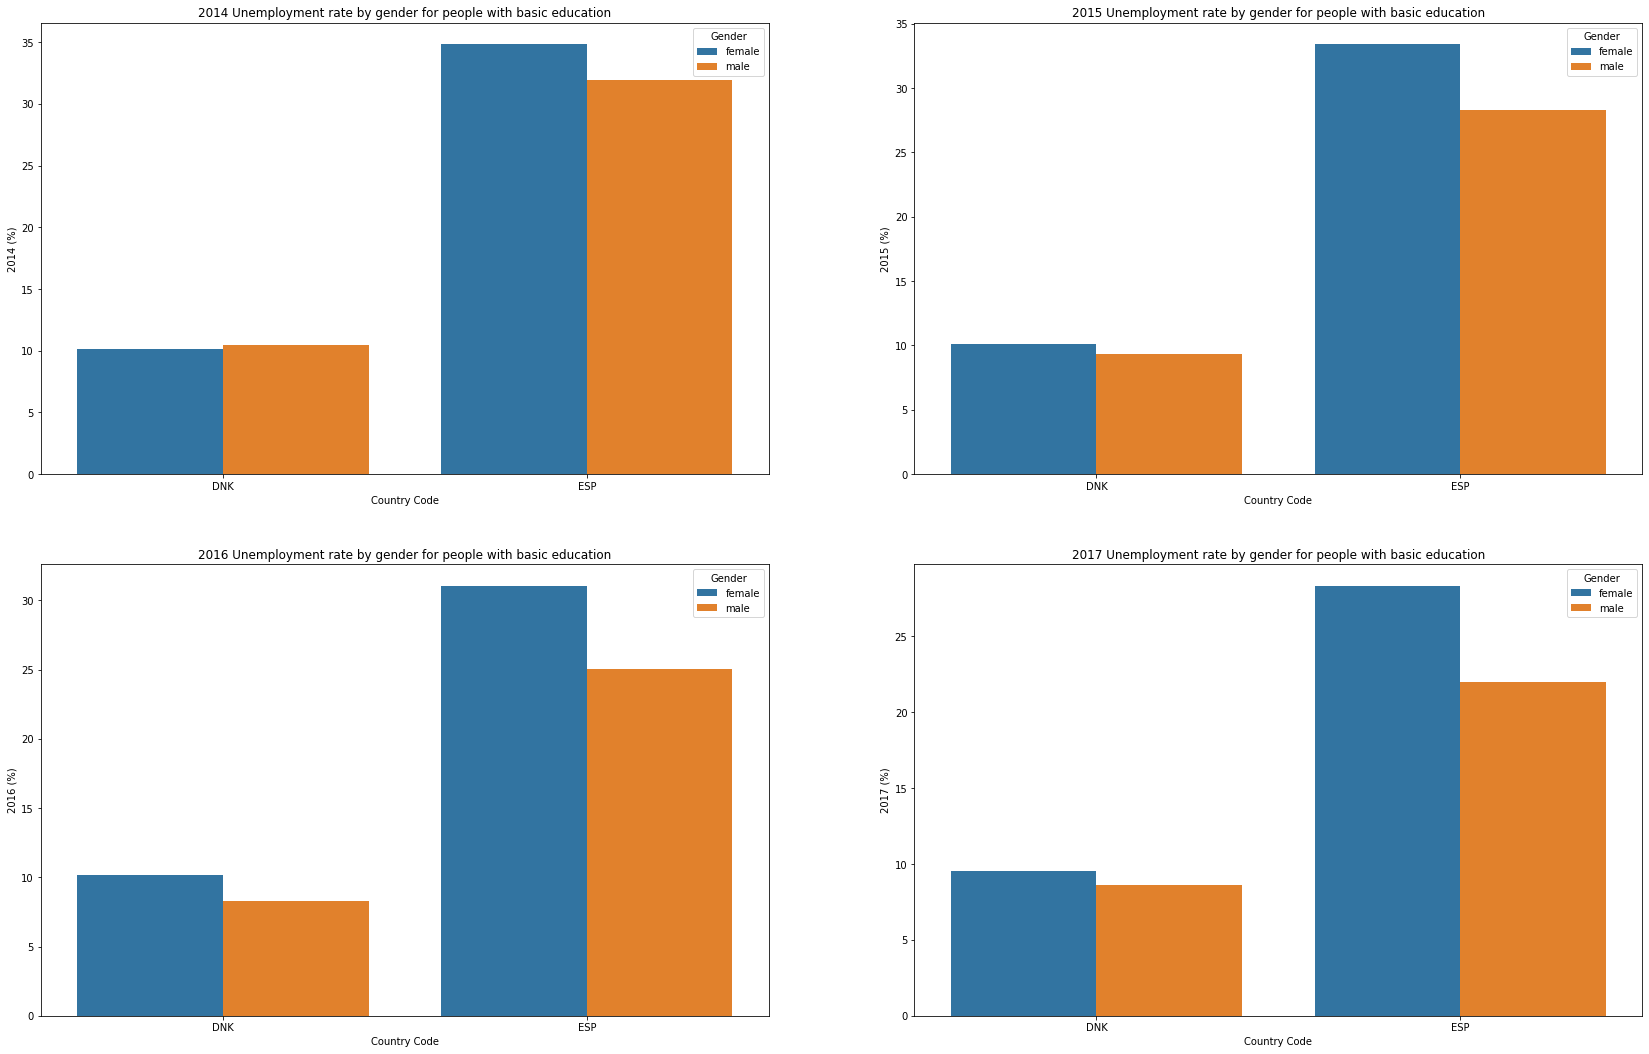

In [54]:
# plots of unemployment between the years 2014-2017 of people with basic education
dim = (28.7, 18.27)

fig, ax = plt.subplots(2, 2, figsize=dim)

sns.barplot(ax = ax[0][0], x="Country Code", y='2014', hue="Gender", data=unemployment_basic_educ_df)
sns.barplot(ax = ax[0][1], x="Country Code", y='2015', hue="Gender", data=unemployment_basic_educ_df)
sns.barplot(ax = ax[1][0], x="Country Code", y='2016', hue="Gender", data=unemployment_basic_educ_df)
sns.barplot(ax = ax[1][1], x="Country Code", y='2017', hue="Gender", data=unemployment_basic_educ_df)


ax[0][0].set(ylabel='2014 (%)', title='2014 Unemployment rate by gender for people with basic education')
ax[0][1].set(ylabel='2015 (%)', title='2015 Unemployment rate by gender for people with basic education')
ax[1][0].set(ylabel='2016 (%)', title='2016 Unemployment rate by gender for people with basic education')
ax[1][1].set(ylabel='2017 (%)', title='2017 Unemployment rate by gender for people with basic education')

[Text(0, 0.5, '2017 (%)'),
 Text(0.5, 1.0, '2017 Unemployment rate by gender for people with intermediate education')]

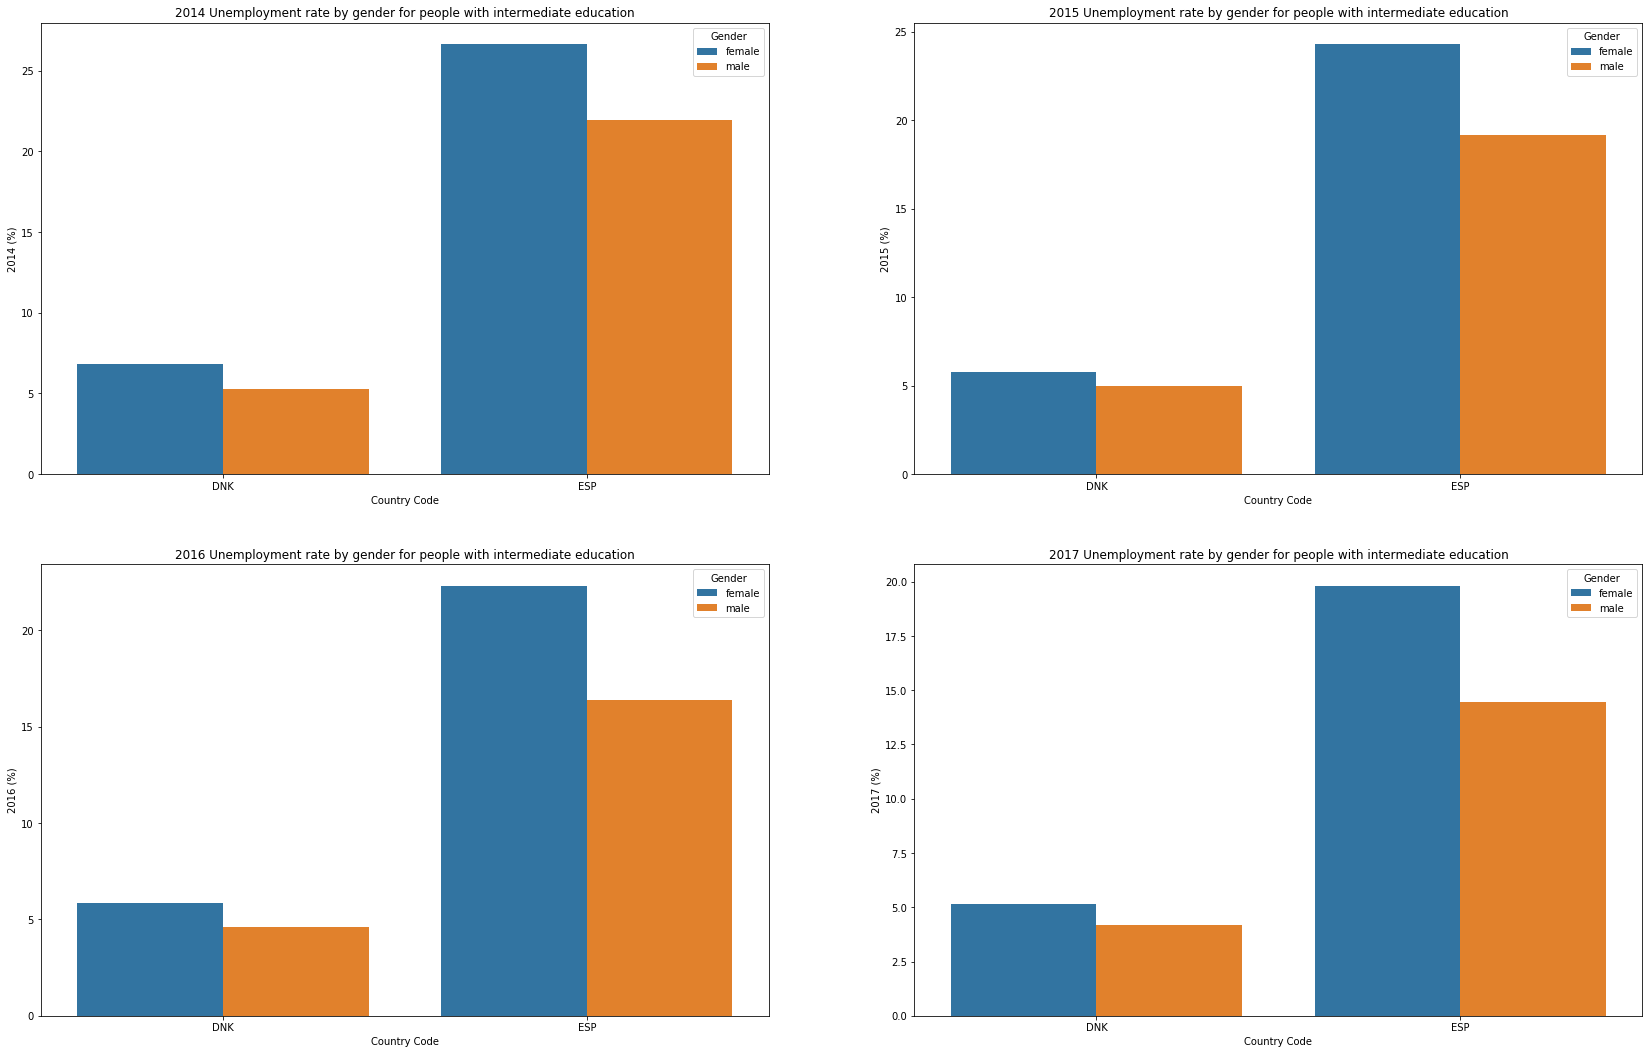

In [55]:
# plots of unemployment between the years 2014-2017 of people with intermediate education
dim = (28.7, 18.27)

fig, ax = plt.subplots(2, 2, figsize=dim)

sns.barplot(ax = ax[0][0], x="Country Code", y='2014', hue="Gender", data=unemployment_interm_educ_df)
sns.barplot(ax = ax[0][1], x="Country Code", y='2015', hue="Gender", data=unemployment_interm_educ_df)
sns.barplot(ax = ax[1][0], x="Country Code", y='2016', hue="Gender", data=unemployment_interm_educ_df)
sns.barplot(ax = ax[1][1], x="Country Code", y='2017', hue="Gender", data=unemployment_interm_educ_df)


ax[0][0].set(ylabel='2014 (%)', title='2014 Unemployment rate by gender for people with intermediate education')
ax[0][1].set(ylabel='2015 (%)', title='2015 Unemployment rate by gender for people with intermediate education')
ax[1][0].set(ylabel='2016 (%)', title='2016 Unemployment rate by gender for people with intermediate education')
ax[1][1].set(ylabel='2017 (%)', title='2017 Unemployment rate by gender for people with intermediate education')

[Text(0, 0.5, '2017 (%)'),
 Text(0.5, 1.0, '2017 Unemployment rate by gender for people with advanced education')]

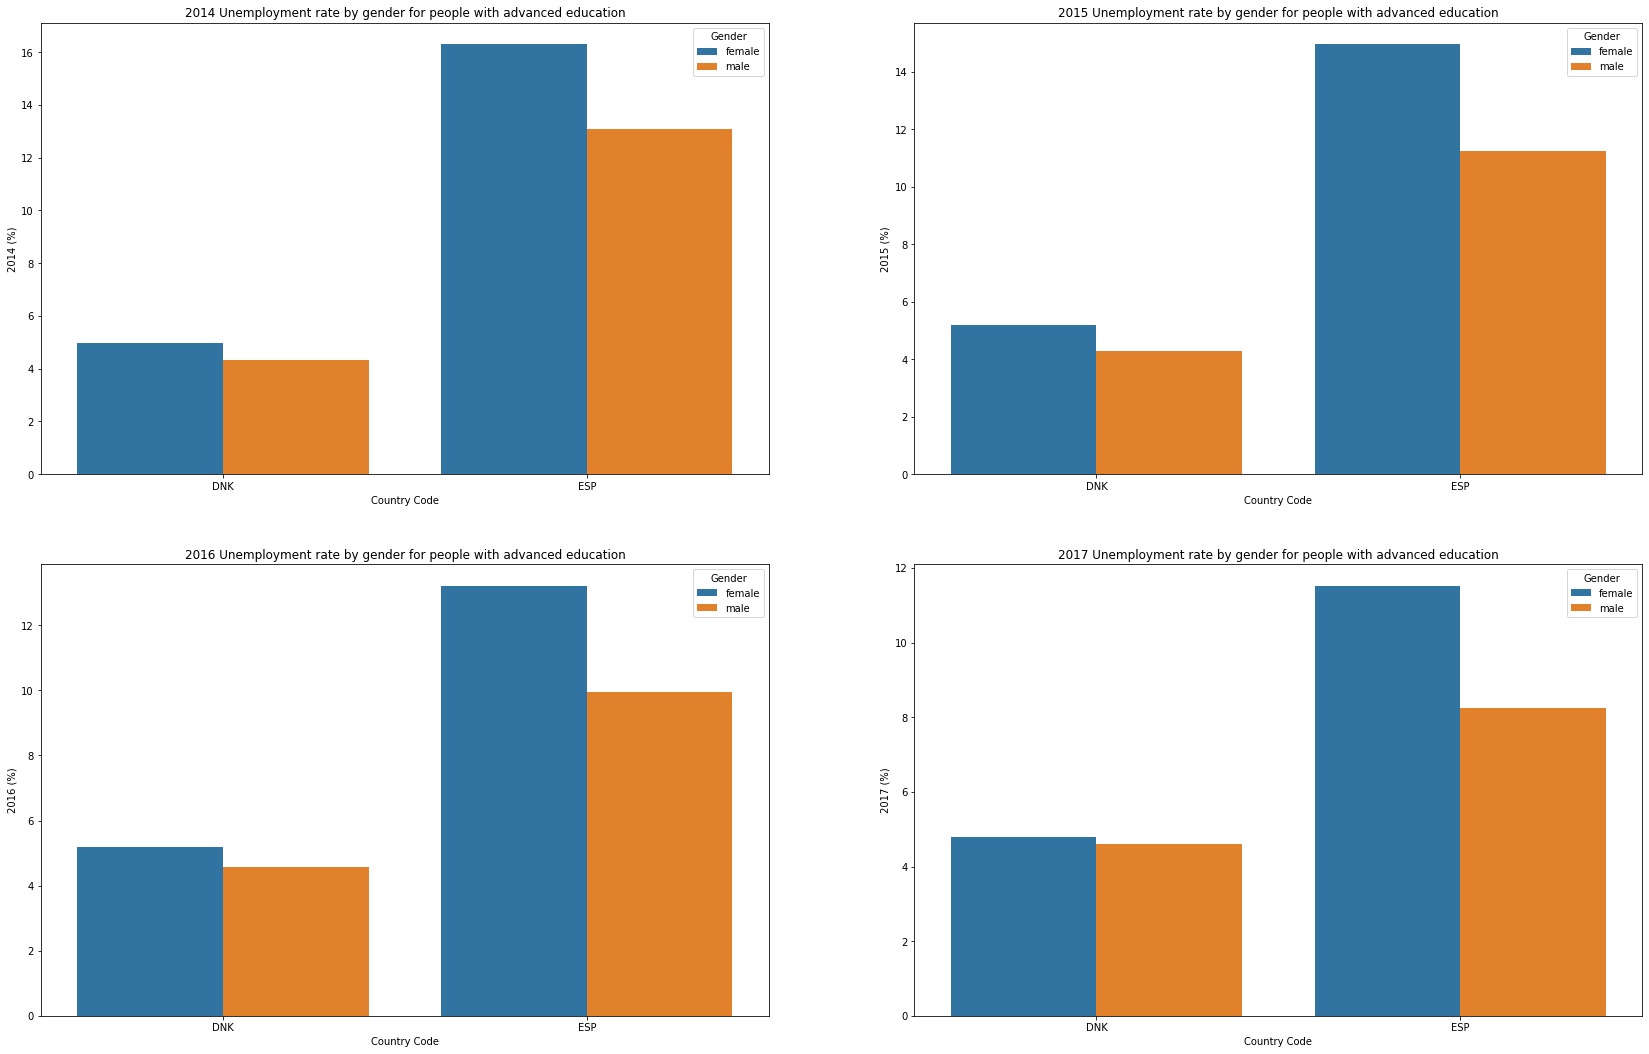

In [56]:
# plots of unemployment between the years 2014-2017 of people with advanced education
dim = (28.7, 18.27)

fig, ax = plt.subplots(2, 2, figsize=dim)

sns.barplot(ax = ax[0][0], x="Country Code", y='2014', hue="Gender", data=unemployment_adv_educ_df)
sns.barplot(ax = ax[0][1], x="Country Code", y='2015', hue="Gender", data=unemployment_adv_educ_df)
sns.barplot(ax = ax[1][0], x="Country Code", y='2016', hue="Gender", data=unemployment_adv_educ_df)
sns.barplot(ax = ax[1][1], x="Country Code", y='2017', hue="Gender", data=unemployment_adv_educ_df)


ax[0][0].set(ylabel='2014 (%)', title='2014 Unemployment rate by gender for people with advanced education')
ax[0][1].set(ylabel='2015 (%)', title='2015 Unemployment rate by gender for people with advanced education')
ax[1][0].set(ylabel='2016 (%)', title='2016 Unemployment rate by gender for people with advanced education')
ax[1][1].set(ylabel='2017 (%)', title='2017 Unemployment rate by gender for people with advanced education')

In [57]:
# prepare data for seaborn lineplot
unemployment_basic_educ_df_sns = unemployment_basic_educ_df.transpose()
unemployment_interm_educ_df_sns = unemployment_interm_educ_df.transpose()
unemployment_adv_educ_df_sns = unemployment_adv_educ_df.transpose()

unemployment_adv_educ_df_sns.head(7)

,0,1,2,3
Series Name,"Unemployment with advanced education, (% of labor force with advanced education)","Unemployment with advanced education, (% of labor force with advanced education)","Unemployment with advanced education, (% of labor force with advanced education)","Unemployment with advanced education, (% of labor force with advanced education)"
Series Code,SL.UEM.ADVN.FE.ZS,SL.UEM.ADVN.FE.ZS,SL.UEM.ADVN.MA.ZS,SL.UEM.ADVN.MA.ZS
Gender,female,female,male,male
Country Name,Denmark,Spain,Denmark,Spain
Country Code,DNK,ESP,DNK,ESP
1998,3.6611,21.7131,3.0471,9.6968
1999,3.5046,18.304,2.5855,7.9292


In [58]:
unemployment_basic_educ_df_sns.columns = ['DNK female', 'ESP female', 'DNK male', 'ESP male']
unemployment_interm_educ_df_sns.columns = ['DNK female', 'ESP female', 'DNK male', 'ESP male']
unemployment_adv_educ_df_sns.columns = ['DNK female', 'ESP female', 'DNK male', 'ESP male']

unemployment_adv_educ_df_sns.head(7)

,DNK female,ESP female,DNK male,ESP male
Series Name,"Unemployment with advanced education, (% of labor force with advanced education)","Unemployment with advanced education, (% of labor force with advanced education)","Unemployment with advanced education, (% of labor force with advanced education)","Unemployment with advanced education, (% of labor force with advanced education)"
Series Code,SL.UEM.ADVN.FE.ZS,SL.UEM.ADVN.FE.ZS,SL.UEM.ADVN.MA.ZS,SL.UEM.ADVN.MA.ZS
Gender,female,female,male,male
Country Name,Denmark,Spain,Denmark,Spain
Country Code,DNK,ESP,DNK,ESP
1998,3.6611,21.7131,3.0471,9.6968
1999,3.5046,18.304,2.5855,7.9292


In [59]:
# make the data frame index an actual column of the data frames since we need the years for the lineplot
unemployment_basic_educ_df_sns['Years'] = unemployment_basic_educ_df_sns.index
unemployment_interm_educ_df_sns['Years'] = unemployment_interm_educ_df_sns.index
unemployment_adv_educ_df_sns['Years'] = unemployment_adv_educ_df_sns.index

unemployment_adv_educ_df_sns.head(7)

,DNK female,ESP female,DNK male,ESP male,Years
Series Name,"Unemployment with advanced education, (% of labor force with advanced education)","Unemployment with advanced education, (% of labor force with advanced education)","Unemployment with advanced education, (% of labor force with advanced education)","Unemployment with advanced education, (% of labor force with advanced education)",Series Name
Series Code,SL.UEM.ADVN.FE.ZS,SL.UEM.ADVN.FE.ZS,SL.UEM.ADVN.MA.ZS,SL.UEM.ADVN.MA.ZS,Series Code
Gender,female,female,male,male,Gender
Country Name,Denmark,Spain,Denmark,Spain,Country Name
Country Code,DNK,ESP,DNK,ESP,Country Code
1998,3.6611,21.7131,3.0471,9.6968,1998
1999,3.5046,18.304,2.5855,7.9292,1999


In [60]:
# the 'Years' column is inserted as the last column; bring it as the first one in all data frames
columns = [unemployment_adv_educ_df_sns.columns[-1]] + unemployment_adv_educ_df_sns.columns.tolist()[:-1]
unemployment_basic_educ_df_sns = unemployment_basic_educ_df_sns[columns]
unemployment_interm_educ_df_sns = unemployment_interm_educ_df_sns[columns]
unemployment_adv_educ_df_sns = unemployment_adv_educ_df_sns[columns]

# now that we made the index of the data frames an actual column we reset it
unemployment_basic_educ_df_sns = unemployment_basic_educ_df_sns.reset_index(drop = True)
unemployment_interm_educ_df_sns = unemployment_interm_educ_df_sns.reset_index(drop = True)
unemployment_adv_educ_df_sns = unemployment_adv_educ_df_sns.reset_index(drop = True)

unemployment_interm_educ_df_sns.head(7)

,Years,DNK female,ESP female,DNK male,ESP male
0,Series Name,"Unemployment with intermediate education, (% of labor force with intermediate education)","Unemployment with intermediate education, (% of labor force with intermediate education)","Unemployment with intermediate education, (% of labor force with intermediate education)","Unemployment with intermediate education, (% of labor force with intermediate education)"
1,Series Code,SL.UEM.INTM.FE.ZS,SL.UEM.INTM.FE.ZS,SL.UEM.INTM.MA.ZS,SL.UEM.INTM.MA.ZS
2,Gender,female,female,male,male
3,Country Name,Denmark,Spain,Denmark,Spain
4,Country Code,DNK,ESP,DNK,ESP
5,1998,6.1886,27.4122,3.5706,13.3079
6,1999,5.5944,24.5145,4.3596,10.8246


In [61]:
#remove rows that will not be used for the lineplot
unemployment_basic_educ_df_sns = unemployment_basic_educ_df_sns[
                                         (unemployment_basic_educ_df_sns['Years'] != 'Series Name') &
                                         (unemployment_basic_educ_df_sns['Years'] != 'Series Code') &
                                         (unemployment_basic_educ_df_sns['Years'] != 'Gender') &
                                         (unemployment_basic_educ_df_sns['Years'] != 'Country Name') &
                                         (unemployment_basic_educ_df_sns['Years'] != 'Country Code')
                                         ].reset_index(drop = True)
                                          
unemployment_interm_educ_df_sns = unemployment_interm_educ_df_sns[
                                         (unemployment_interm_educ_df_sns['Years'] != 'Series Name') &
                                         (unemployment_interm_educ_df_sns['Years'] != 'Series Code') &
                                         (unemployment_interm_educ_df_sns['Years'] != 'Gender') &
                                         (unemployment_interm_educ_df_sns['Years'] != 'Country Name') &
                                         (unemployment_interm_educ_df_sns['Years'] != 'Country Code')
                                         ].reset_index(drop = True)
                                          
unemployment_adv_educ_df_sns = unemployment_adv_educ_df_sns[
                                         (unemployment_adv_educ_df_sns['Years'] != 'Series Name') &
                                         (unemployment_adv_educ_df_sns['Years'] != 'Series Code') &
                                         (unemployment_adv_educ_df_sns['Years'] != 'Gender') &
                                         (unemployment_adv_educ_df_sns['Years'] != 'Country Name') &
                                         (unemployment_adv_educ_df_sns['Years'] != 'Country Code')
                                         ].reset_index(drop = True)
                                          
unemployment_interm_educ_df_sns.head(7)

,Years,DNK female,ESP female,DNK male,ESP male
0,1998,6.1886,27.4122,3.5706,13.3079
1,1999,5.5944,24.5145,4.3596,10.8246
2,2000,5.002,20.7699,3.8802,8.456
3,2001,4.7628,15.4686,3.1698,6.8486
4,2002,3.6896,16.9811,3.6227,7.0344
5,2003,4.7559,16.0642,4.1492,8.258
6,2004,5.8546,15.0165,4.4812,7.7264


In [62]:
unemployment_interm_educ_df_sns.dtypes

Years         object
DNK female    object
ESP female    object
DNK male      object
ESP male      object
dtype: object

In [63]:
# convert the data from the columns to integer ('Years' column) and to float (the other columnes)
unemployment_basic_educ_df_sns['Years'] = pd.to_numeric(unemployment_basic_educ_df_sns['Years'], downcast='integer')
unemployment_interm_educ_df_sns['Years'] = pd.to_numeric(unemployment_interm_educ_df_sns['Years'], downcast='integer')
unemployment_adv_educ_df_sns['Years'] = pd.to_numeric(unemployment_adv_educ_df_sns['Years'], downcast='integer')

for col in unemployment_interm_educ_df_sns.columns[1:]:
    unemployment_basic_educ_df_sns[col] = pd.to_numeric(unemployment_basic_educ_df_sns[col], downcast='float')
    unemployment_interm_educ_df_sns[col] = pd.to_numeric(unemployment_interm_educ_df_sns[col], downcast='float')
    unemployment_adv_educ_df_sns[col] = pd.to_numeric(unemployment_adv_educ_df_sns[col], downcast='float')    

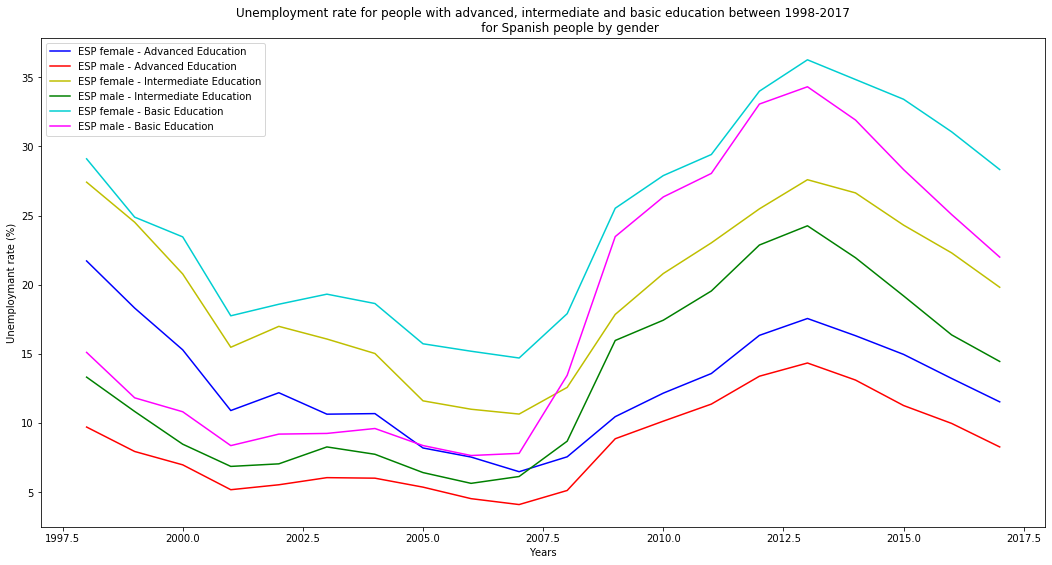

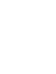

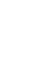

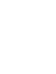

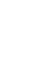

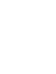

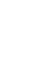

In [64]:
dim = (18, 9)
fig, ax = plt.subplots(figsize=dim)

plot1 = sns.relplot(x='Years', y="ESP female", sort=False, kind="line", data=unemployment_adv_educ_df_sns, ax = ax, color='b')
plot2 = sns.relplot(x='Years', y="ESP male",   sort=False, kind="line", data=unemployment_adv_educ_df_sns, ax = ax, color='r')
plot3 = sns.relplot(x='Years', y="ESP female", sort=False, kind="line", data=unemployment_interm_educ_df_sns, ax = ax, color='y')
plot4 = sns.relplot(x='Years', y="ESP male",   sort=False, kind="line", data=unemployment_interm_educ_df_sns, ax = ax, color='g')
plot5 = sns.relplot(x='Years', y="ESP female", sort=False, kind="line", data=unemployment_basic_educ_df_sns, ax = ax, color='darkturquoise')
plot6 = sns.relplot(x='Years', y="ESP male",   sort=False, kind="line", data=unemployment_basic_educ_df_sns, ax = ax, color='magenta')

plot1.fig.set_visible(False)
plot2.fig.set_visible(False)
plot3.fig.set_visible(False)
plot4.fig.set_visible(False)
plot5.fig.set_visible(False)
plot6.fig.set_visible(False)

plot1.fig.set_size_inches(0.02, 0.02) 
plot2.fig.set_size_inches(0.02, 0.02) 
plot3.fig.set_size_inches(0.02, 0.02) 
plot4.fig.set_size_inches(0.02, 0.02) 
plot5.fig.set_size_inches(0.02, 0.02) 
plot6.fig.set_size_inches(0.02, 0.02) 

ax.set(ylabel='Unemploymant rate (%)',
       title='''Unemployment rate for people with advanced, intermediate and basic education between 1998-2017
              for Spanish people by gender''')

ax.legend(['ESP female - Advanced Education', 'ESP male - Advanced Education', 
           'ESP female - Intermediate Education', 'ESP male - Intermediate Education',
          'ESP female - Basic Education', 'ESP male - Basic Education'])

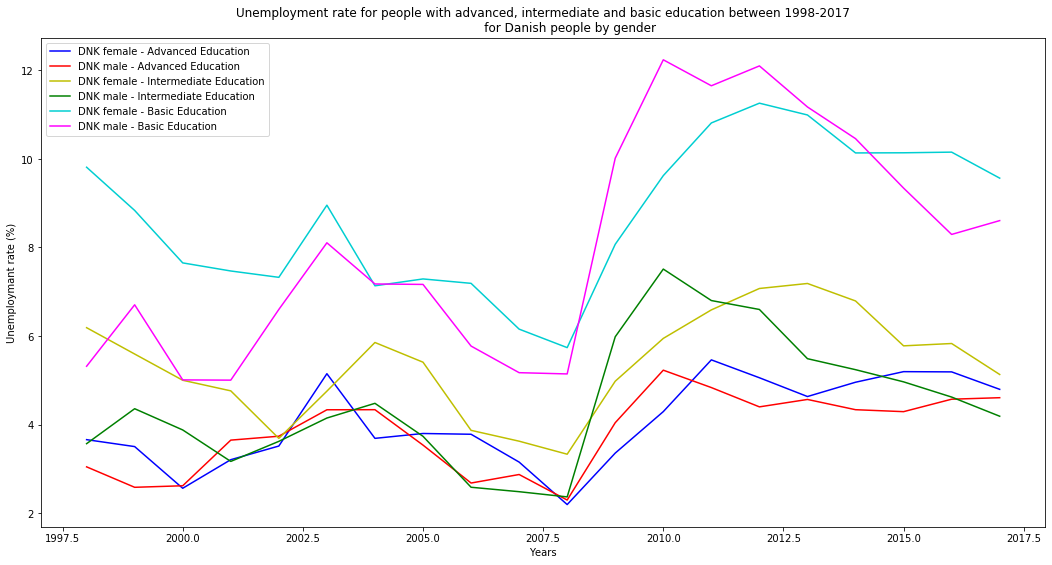

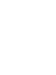

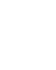

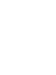

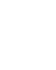

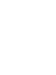

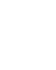

In [65]:
dim = (18, 9)
fig, ax = plt.subplots(figsize=dim)

plot1 = sns.relplot(x='Years', y="DNK female", sort=False, kind="line", data=unemployment_adv_educ_df_sns, ax = ax, color='b')
plot2 = sns.relplot(x='Years', y="DNK male",   sort=False, kind="line", data=unemployment_adv_educ_df_sns, ax = ax, color='r')
plot3 = sns.relplot(x='Years', y="DNK female", sort=False, kind="line", data=unemployment_interm_educ_df_sns, ax = ax, color='y')
plot4 = sns.relplot(x='Years', y="DNK male",   sort=False, kind="line", data=unemployment_interm_educ_df_sns, ax = ax, color='g')
plot5 = sns.relplot(x='Years', y="DNK female", sort=False, kind="line", data=unemployment_basic_educ_df_sns, ax = ax, color='darkturquoise')
plot6 = sns.relplot(x='Years', y="DNK male",   sort=False, kind="line", data=unemployment_basic_educ_df_sns, ax = ax, color='magenta')

plot1.fig.set_visible(False)
plot2.fig.set_visible(False)
plot3.fig.set_visible(False)
plot4.fig.set_visible(False)
plot5.fig.set_visible(False)
plot6.fig.set_visible(False)

plot1.fig.set_size_inches(0.02, 0.02) 
plot2.fig.set_size_inches(0.02, 0.02) 
plot3.fig.set_size_inches(0.02, 0.02) 
plot4.fig.set_size_inches(0.02, 0.02) 
plot5.fig.set_size_inches(0.02, 0.02) 
plot6.fig.set_size_inches(0.02, 0.02) 

ax.set(ylabel='Unemploymant rate (%)',
       title='''Unemployment rate for people with advanced, intermediate and basic education between 1998-2017
              for Danish people by gender''')

ax.legend(['DNK female - Advanced Education', 'DNK male - Advanced Education', 
           'DNK female - Intermediate Education', 'DNK male - Intermediate Education',
          'DNK female - Basic Education', 'DNK male - Basic Education'])